In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import os
import numpy as np
import datetime
import re
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import Dot, LSTM, Bidirectional, Reshape,Flatten
#from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Conv1D
pd.set_option("display.max_colwidth",None)
#pip install keras_nlp
#from keras_nlp.layers import PositionEmbedding

import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
# This notebook shall train ML model for predicting resolution of alerts.
# ML model used are SVM , RF, XG Boost

In [75]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("comb_data_ind_final3")
df = mydataset.get_dataframe()

## Traning data till September

In [0]:
df.sort_values("D_UPDATED_DTM",ascending=False,inplace=True)

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
df["D_UPDATED_DTM"]=pd.to_datetime(df["D_UPDATED_DTM"],infer_datetime_format=True)
df.loc[:,["D_UPDATED_DTM"]].info()
df["D_UPDATED_DTM"]=df["D_UPDATED_DTM"].apply(lambda x: x.date())


# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
var1=datetime.date(2023,11,1)


df=df[df["D_UPDATED_DTM"]<var1]
df["D_UPDATED_DTM"]

In [100]:
# Unseen processed data path - (October 10 K)
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
csv_path=os.path.join(folder_path,"Unseen_processed_data.csv")
df_test=pd.read_csv(csv_path)

# Data Quality & Descriptive stats info

try:
    df_test.drop("Unnamed: 0",axis=1,inplace=True)
except:
    pass
df_test=df_test.rename(columns={"NAME_MATCH_SCORE":"SIAMESE_MATCH_SCORE"})
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 136 entries, N_PARTY_WATCHLIST_MATCH_ID to Final_Nysiis_bisim_score
dtypes: float64(34), int64(12), object(90)
memory usage: 10.4+ MB
None


In [14]:
import spacy, spacy.cli
import os
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import seaborn as sns
import re
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

import spacy, spacy.cli
from spacy.cli.init_config import fill_config
from spacy.cli.train import train, train_cli
from spacy.cli.evaluate import evaluate
from spacy.cli.convert import convert
import datetime


import os
import joblib
import warnings


warnings.filterwarnings('ignore')

In [15]:
# folder path definition. folder NER model contains the trained model object.

handle = dataiku.Folder('NER_model')
folder_path = handle.get_path()

# Feature -1,2 (DOB,Age)

In [77]:
from DOB_pre_process import DOB_process
df_dob=DOB_process(df)

In [17]:
#df_final=df[["Index","V_UCIF_ID","N_WATCHLIST_PROFILE_ID","N_PARTY_WATCHLIST_MATCH_ID","D_CREATED_DTM"]].merge(df_dob_results_1,how='inner',on="Index")

,N_PARTY_WATCHLIST_MATCH_ID,FINAL_DOB_MATCH,V_RESOLUTION,V_COMMENTS,N_MATCH_SCORE
443336,5638786,0.0,FP,Mismatch Year of Birth (YOB). Customer's YOB is 1995 while watch person's YOB is 1962 as per worldcheck.,100.0
137254,4605798,-1.0,FP,"Mismatch Profile\nAccording to World Check, Watchperson is a Head of Center for Mineral, Coal and Geothermal Resources at Geological Agency of the Ministry of Energy and Mineral Resources (Apr 2022 - ). Meanwhile, customer is an AGRICULTURAL, FORESTRY, FARMING AND FISHERY LABOURERS for SRI WALIS (M) SDN BHD as per UCO. Thus, it is highly unlikely that they are the same person.",100.0
404922,7747534,0.8,FP,Mismatch Full Legal Name_Name Does Not Sound Similar,90.0
557051,6550287,0.5,FP,Year of birth mismatch.,100.0
18243,6124513,0.5,THNM,True Hit Non-Material. Watchperson in Jan 2010 - sentenced by Liaoyuan Municipal Intermediate Court to life imprisonment and deprived of political rights for life {2}. There was no further update/information on the news. The incident was happened more than 7 years ago with no further update/recurrence deemed as not relevant to the business relationship between the customer and Maybank.,100.0
...,...,...,...,...,...
598481,1614959,0.6,FP,NaN,93.0
255670,1649861,1.0,TH,NaN,100.0
705851,1622789,1.0,TH,NaN,100.0
524114,973497,1.0,TH,NaN,100.0


In [19]:
df_dob["FINAL_DOB_MATCH"].value_counts()

 0.0    280714
-1.0    270593
 0.6    118219
 1.0    106363
 0.5     19438
 0.8     15133
Name: FINAL_DOB_MATCH, dtype: int64

# Feature -3 (ID)

In [20]:
# import os
# folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# csv_path=os.path.join(folder_path,"Id_ind_similarity_score .csv")

# df_id=pd.read_csv(csv_path)
# try:
#     df_id.drop("Unnamed: 0",axis=1,inplace=True)
# except:
#     df_id 

In [21]:
from ID_ind_pre_process import ID_process
df_id=ID_process(df)

In [22]:
df_id=df_id[['N_PARTY_WATCHLIST_MATCH_ID',  'al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'final_sc',"score1"]]

In [23]:
df_id["ID_score"]=df_id["final_sc"].apply(lambda x: 1-x if x!=-1 else x)

In [24]:
df_id[["al_wl_ids","cust_id_all_sp_accom","ID_score"]].head()

,al_wl_ids,cust_id_all_sp_accom,ID_score
443336,NaN,[EE0199288],-1.0
137254,NaN,[C0816917],-1.0
404922,NaN,"[PF4574209, EJ5051529]",-1.0
557051,NaN,[BQ0001445],-1.0
18243,NaN,"[PE1844290, PF5000726]",-1.0


In [25]:
df_id["ID_score"].value_counts()

-1.000000    377432
 0.000000    329038
 1.000000     97833
 0.916667      3133
 0.750000      1476
 0.833333       670
 0.888889       385
 0.875000       127
 0.950000       118
 0.300000        72
 0.900000        47
 0.285714        23
 0.850000        22
 0.350000        14
 0.625000        12
 0.857143        10
 0.400000         9
 0.777778         9
 0.342857         4
 0.714286         4
 0.818182         3
 0.666667         3
 0.857143         3
 0.666667         3
 0.800000         3
 0.500000         3
 0.909091         2
 0.375000         1
 0.529412         1
Name: ID_score, dtype: int64

In [28]:
df

,N_PARTY_WATCHLIST_MATCH_ID,V_UCIF_ID,V_SCREENING_ID,N_WATCHLIST_PROFILE_ID,N_MATCH_SCORE,V_WATCHLIST_PARTY_NAME,V_INFO_SOURCE,V_WL_STATUS_CODE,D_DT_OF_SCREENING,V_COMMENTS,N_WORKFLOW_ID,F_RECENT_MATCH,V_RESOLUTION,V_REASON,F_DELTA_MATCH,D_CREATED_DTM,V_CREATED_BY,D_UPDATED_DTM,V_UPDATED_BY,N_SCREENING_VERSION,V_COUNTRY_OF_ONBOARDING,V_UCIF_ID_1,V_PARTY_CLASS,V_PARTY_TYPE,V_REGD_PARTY_NAME,V_ALIAS_NAME,V_GENDER,V_PARTY_FIRST_NAME,V_PARTY_MID_NAME,V_PARTY_LST_NAME,D_INCORPORATION_DATE,V_COUNTRY_OF_INCORP,V_COUNTRY_OF_BIRTH,V_PREVIOUS_NAME_IMMEDIATE,V_PREVIOUS_NAME_1,V_PREVIOUS_NAME_2,D_DOB,D_DECEASED_DATE,F_DECEASED_FLAG,V_COUNTRY_OF_BIRTH_1,V_FATHERS_NAME,V_MOTHERS_NAME,V_CREATED_BY_1,D_CREATED_DTM_1,V_UPDATED_BY_1,D_UPDATED_DTM_1,F_DELETE_FLAG,F_UPDATE_FLAG,V_LEGAL_STRUCTURE,F_PEP_STATUS,F_FMLY_PEP_STATUS,V_PEP_BIOGRAPHY,V_PEP_RELATIONSHIP,V_PEP_NAME,V_UCIF_ID_1_1,V_COUNTRY_OF_ONBOARDING_1,V_PARTY_GROUP,V_CITIZENSHIP,V_DUAL_CITIZENSHIP,V_OCC_CODE,V_COUNTRY_PERM_RES,V_SCREENING_STATUS,V_SCREENING_ID_1,V_CREATED_BY_PL,D_CREATED_DTM_PL,V_UPDATED_BY_PL,D_UPDATED_DTM_1_1,F_DELETE_FLAG_1,F_UPDATE_FLAG_1,N_SCREENING_VERSION_1,V_EMPLOYER_NAME,D_LAST_SCREENING_DATE,V_RACE,V_PARTY_CLASS_LEGACY,V_TITLE,V_RESIDENT_STATUS,V_UCIF_ID_2,AGG_UNQ_DOC_ID,AGG_V_ID_TYPE,V_PRIM_PTY_UCIF_ID,V_SEC_PTY_UCIF_ID,V_RELATION_TYPE_CD,N_NUMBER_OF_SHARES,N_SHAREHOLDING_PERCENT,V_SEC_PARTY_NAME,N_WATCHLIST_PROFILE_ID_1,V_WATCHLIST_PROFILE_UID,V_PROFILE_TYPE,V_PROFILE_NAME,V_ALIASES,V_TITLE_1,V_DOB,V_DOI,V_NATIONALITY,V_COI,V_IDENTIFICATION_NO,V_IC_NO,V_PLACE_OF_BIRTH,V_GENDER_WL,V_PEP_POSITION,V_BIOGRAPHY,V_INFO_SOURCE_1,V_REMARK,V_WL_STATUS_CODE_1,V_STATUS,D_CREATED_DTM_2,D_UPDATED_DTM_2,V_CATEGORY,V_SUB_CATEGORY,V_LOCATION_DETAILS,V_AGE,V_AGE_AS_OF_DATE
443336,5638786,59573845,14125572,14168047,100.0,Ahmed ALI,ANEWS,76,2021-06-12 00:00:00,Mismatch Year of Birth (YOB). Customer's YOB is 1995 while watch person's YOB is 1962 as per worldcheck.,NaN,N,FP,PI,N,2021-06-12 01:12:43,2e4a1d58-f055-49b6-a0d7-8a18982d1751,2023-09-30,80006684,1,MYS,59573845,I,11000.0,AHMED ALI,NaN,M,AHMED,NaN,ALI,NaN,NaN,BGD,NaN,NaN,NaN,1995-01-20 00:00:00,NaN,N,BGD,NaN,NaN,000AC54A,2020-02-24 10:48:31,00069059,2021-03-25 13:11:56.643,N,NaN,INDV,NaN,NaN,NaN,NaN,NaN,59573845,MYS,EXT,BGD,NaN,U002,MYS,NOHITS,14125572,000AC54A,2020-02-24 10:48:31,00152251,2023-10-19 18:33:34.043283,N,NaN,1,NaN,2021-11-29 00:00:00,OTH,502.0,MRR,NONR,59573845.0,"[""EE0199288""]","[""PASS""]",NaN,NaN,NaN,NaN,NaN,NaN,14168047,5156225,I,Ahmed ALI,NaN,NaN,NaN,NaN,BANGLADESH,NaN,NaN,NaN,NaN,M,NaN,"[BIOGRAPHY] Alleged member {General} of Al-Qa'ida in the Indian Subcontinent and Ansarullah Bangla Team. Detained (Jul 2019). [IDENTIFICATION] Salma Ahmed (spouse). Abu Saleh Mohammad Jakaria (son). Abu Saleh Mohammad Kibria (son). Asma Ferdous Ripa (daughter). [FUNDING] To be determined. [REPORTS] Jul 2019 - detained in Rupnagar, Dhaka by Anti-Terrorism Unit for alleged involvement in terrorism. Weapons, chemicals, explosive manufacturing substances and jihadi literature seized. Remanded in custody.[NONCONVICTION TERROR CATEGORY NOTICE] This category includes information about individuals who are reportedly being investigated for, or have been arrested or charged on suspicion of, involvement in terrorism or terror related activities. The category also includes individuals or entities identified on national or internationally recognised banning, warning or wanted lists as allegedly connected to terrorism or individuals who are reportedly connected to an organisation included on any national or international terrorism list. Inclusion in this category does not mean that an individual or entity is a terrorist or terrorist organisation or that they are involved in or connected to terrorism or terror related activity. Individuals included in this category have not been convicted of any terror related activity; you should review the content carefully and in accordance with our terms and conditions, further enquiries should b

# Feature -4 ( Name)

### Siamese Model

In [30]:
print(df[["N_WATCHLIST_PROFILE_ID","V_ALIASES"]].info())
print(df["V_ALIASES"].apply(lambda x: type(x)).unique())
df["V_ALIASES"].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810460 entries, 443336 to 781673
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   N_WATCHLIST_PROFILE_ID  810460 non-null  int64 
 1   V_ALIASES               118488 non-null  object
dtypes: int64(1), object(1)
memory usage: 50.8+ MB
None
[<class 'float'> <class 'str'>]


443336               NaN
137254               NaN
404922               NaN
557051               NaN
18243     WANG,Xiao Dong
Name: V_ALIASES, dtype: object

In [31]:
#df_to_match=process_name(df)

In [80]:
# folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# standradization_names_path=os.path.join(folder_path,"Name_standardized_file_for_training.csv")
# df_to_match.to_csv(standradization_names_path)

In [33]:
df_new=df.copy()
my_dataset = dataiku.Dataset("Standradization_rules_draft__base_line_model")
scr_rules = my_dataset.get_dataframe()

scr_rules.loc[46:51,"V_SCREENING_VALUE_1"]=scr_rules.loc[46:51,"V_SCREENING_VALUE_1"].apply(lambda x: x.lstrip("( ").rstrip(")"))

scr_rules_2=scr_rules.iloc[21:45,:] # Punctuation marks
scr_rules_3=scr_rules.iloc[46:52,:]  #  Standardization rules
scr_rules=scr_rules.iloc[0:16,:]    # patronym & honourary titles



df_new["V_COMMENTS"]=df_new["V_COMMENTS"].apply(lambda x: '' if pd.isna(x) else x)

# Customer Name 

df_new['V_PREVIOUS_NAME_1']=df_new['V_PREVIOUS_NAME_1'].apply(lambda x : [""]  if pd.isna(x) else [str(x).upper()])
df_new['V_PREVIOUS_NAME_2']=df_new['V_PREVIOUS_NAME_2'].apply(lambda x :  [""] if pd.isna(x) else [str(x).upper()])
df_new['V_PREVIOUS_NAME_IMMEDIATE']=df_new['V_PREVIOUS_NAME_IMMEDIATE'].apply(lambda x :  [""] if pd.isna(x) else [str(x).upper()])


# pre-processing on "V_REGD_PARTY_NAME"

df_new["V_REGD_PARTY_NAME"]=df_new["V_REGD_PARTY_NAME"].apply(lambda x : [""]  if pd.isna(x) else [str(x).upper()])
# not more than element is present in V_REGD_PARTY_NAMES
df_new[df_new["V_REGD_PARTY_NAME"].apply(lambda x: len(x)>1)]

# imputation done
df_new[["V_REGD_PARTY_NAME", 'V_PREVIOUS_NAME_IMMEDIATE', 'V_PREVIOUS_NAME_1','V_PREVIOUS_NAME_2']]
name_df_new=pd.DataFrame({})
name_df_new["ALL_PARTY_NAMES"]=df_new[["V_REGD_PARTY_NAME", 'V_PREVIOUS_NAME_IMMEDIATE', 'V_PREVIOUS_NAME_1','V_PREVIOUS_NAME_2']].apply(lambda x: x[0]+x[1]+x[2]+x[3],axis=1)


In [34]:
# Patronym , ' - , Honourary Titles 
for k in [' A/L | A/P | S/O | D/O | SO | DO | AP ',' BINTI | BINTE | B | BTE | BT | IBNI | IBNU | ANAK ']:  # if any patronym title comes , then remove it 
    name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(k," ",x[0]),re.sub(k," ",x[1]),re.sub(k," ",x[2]),re.sub(k," ",x[3])])

#' apostrophe Abd Alfattah So'ud Abd Alfattah DARDAS
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("\'","",x[0]),re.sub("\'","",x[1]),re.sub("\'","",x[2]),re.sub("\'","",x[3])])

# - dash
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("-"," ",x[0]),re.sub("-"," ",x[1]),re.sub("-"," ",x[2]),re.sub("-"," ",x[3])])


for k in scr_rules["V_SCREENING_VALUE_1"].values[4:16].tolist():

    name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("^("+k+")","",x[0]),re.sub("^("+k+")","",x[1]),re.sub("^("+k+")","",x[2]),re.sub("^("+k+")","",x[3])]) 
# We need to remove HAJI & all such terms if in case they come in b/w names.
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(" HAJI | HAJJAH | HAJAH | HJH | HJ | ALHAJ | HADJI "," ",i) for i in x])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("( HAJI| HAJJAH| HAJAH| HJH| HJ| ALHAJ| HADJI)$","",i) for i in x])


# Need to add a cap ^ to remove only the names where titles come as prefix.

# Pre-processing (Step-2) & getting Alias names
# () Alias name  -  below alias name 2 column, has list in each row.
name_df_new["V_ALIAS_NAME_2"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.findall("\(.+\)",x[i]) for i in range(len(x))])


name_df_new["V_ALIAS_NAME_2"]=name_df_new["V_ALIAS_NAME_2"].apply(lambda x: [x[i][0].lstrip("(").rstrip(")") if len(x[i])>0 else "" for i in range(len(x))])

name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(" \(.+\)","",x[i]) for i in range(len(x))])


#@ 
name_df_new["V_ALIAS_NAME_3"]=[""]*(df_new.shape[0])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.split("@",x[i]) for i in range(len(x))])

name_df_new["V_ALIAS_NAME_3"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [x[i][1].lstrip(" ") if len(x[i]) >1 else "" for i in range(len(x))])

name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply( lambda x: [x[i][0].rstrip(" ") for i in range(len(x)) ])



# slash - if more than one slash than issue shall arise
name_df_new["V_ALIAS_NAME_4"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.split(" / ",x[i]) for i in range(len(x))])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["V_ALIAS_NAME_4"].apply(lambda x:[x[i][0] for i in range(len(x))])
name_df_new["V_ALIAS_NAME_4"]=name_df_new["V_ALIAS_NAME_4"].apply(lambda x:[x[i][1] if len(x[i])>1 else "" for i in range(len(x))])


# Accented Characters
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Á,Ä,Â,Ã]","A",x[0]),re.sub("[Á,Ä,Â,Ã]","A",x[1]),re.sub("[Á,Ä,Â,Ã]","A",x[2]),re.sub("[Á,Ä,Â,Ã]","A",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Å]","AA",x[0]),re.sub("[Å]","AA",x[1]),re.sub("[Å]","AA",x[2]),re.sub("[Å]","AA",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[É,Ë,Ê,È]","E",x[0]),re.sub("[É,Ë,Ê,È]","E",x[1]),re.sub("[É,Ë,Ê,È]","E",x[2]),re.sub("[É,Ë,Ê,È]","E",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Í,Ï,Î]","I",x[0]),re.sub("[Í,Ï,Î]","I",x[1]),re.sub("[Í,Ï,Î]","I",x[2]),re.sub("[Í,Ï,Î]","I",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Ó,Ô,Ö,Õ]","O",x[0]),re.sub("[Ó,Ô,Ö,Õ]","O",x[1]),re.sub("[Ó,Ô,Ö,Õ]","O",x[2]),re.sub("[Ó,Ô,Ö,Õ]","O",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Ú,Ü,Ù]","U",x[0]),re.sub("[Ú,Ü,Ù]","U",x[1]),re.sub("[Ú,Ü,Ù]","U",x[2]),re.sub("[Ú,Ü,Ù]","U",x[3])])

name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Ø]","OE",x[0]),re.sub("[Ø]","OE",x[1]),re.sub("[Ø]","OE",x[2]),re.sub("[Ø]","OE",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Ç]","C",x[0]),re.sub("[Ç]","C",x[1]),re.sub("[Ç]","C",x[2]),re.sub("[Ç]","C",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Ñ]","N",x[0]),re.sub("[Ñ]","N",x[1]),re.sub("[Ñ]","N",x[2]),re.sub("[Ñ]","N",x[3])])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("[Ý]","Y",x[0]),re.sub("[Ý]","Y",x[1]),re.sub("[Ý]","Y",x[2]),re.sub("[Ý]","Y",x[3])])


name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [i.replace(r"\xa0","") for i in x ]) 


name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [i.replace(r"\xa0","") for i in x ])
df_new["V_REGD_PARTY_NAME"]=df_new["V_REGD_PARTY_NAME"].apply(lambda x: x[0])

### Punctuation Marks

df_new[df_new["V_REGD_PARTY_NAME"].str.contains(",\s")]["V_REGD_PARTY_NAME"]
df_new[df_new["V_REGD_PARTY_NAME"].str.contains("\s+,\s+")]["V_REGD_PARTY_NAME"]
### comma 
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("\s+,\s+"," ",i) for i in x])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub("\s+,"," ",i) for i in x])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(",\s+"," ",i) for i in x])
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(","," ",i) for i in x])



scr_rules_2
for j in scr_rules_2["V_SCREENING_VALUE_1"]:

    name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(j," ",x[i]) for i in range(len(x))])

### Standardized Names

for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x: [re.sub(k[0],k[1],x[i]) for i in range(len(x))])

# For any other miscellaneous character
name_df_new["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].apply(lambda x : [re.sub("[^A-Z\s ]+","",x[i]) for i in range(len(x))])


In [35]:
# V_ALIAS_NAME - Punctuation mark , std names , miscellaneous character
name_df_new["GROUP_ALIAS_NAME_1"]=name_df_new[["V_ALIAS_NAME_2","V_ALIAS_NAME_3","V_ALIAS_NAME_4"]].apply(lambda x: x[0]+x[1]+x[2],axis=1)
scr_rules_2
for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    #name_df_new["V_ALIAS_NAME_2"]=name_df_new["V_ALIAS_NAME_2"].apply(lambda x: [re.sub(i," ",x[j]) for j in range(len(x))])
    name_df_new["GROUP_ALIAS_NAME_1"]=name_df_new["GROUP_ALIAS_NAME_1"].apply(lambda x: [re.sub(str(i)," ",x[j]) for j in range(len(x))])

#Std Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    name_df_new["GROUP_ALIAS_NAME_1"]=name_df_new["GROUP_ALIAS_NAME_1"].apply(lambda x: [re.sub(k[0],k[1],x[i]) for i in range(len(x))])


 # Miscellaneous character
name_df_new["GROUP_ALIAS_NAME_1"]=name_df_new["GROUP_ALIAS_NAME_1"].apply(lambda x : [re.sub("[^A-Z\s ]+","",x[i]) for i in range(len(x)) ])                                                                  

# Watch-list names Pre-processing

df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: "" if pd.isna(x) else x)

# Patronym , ' - , Honourary Titles 
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].str.upper()
for k in [' A/L | A/P | S/O | D/O | SO | DO | AP ',' BINTI | BINTE | B | BTE | BT | IBNI | IBNU | ANAK ']:  # if any patronym title comes , then remove it 
    df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(k," ",x))
#' apostrophe Abd Alfattah So'ud Abd Alfattah DARDAS
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("\'","",x))
# - dash
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("-"," ",x))

for k in scr_rules["V_SCREENING_VALUE_1"].values[4:16].tolist():

    df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("^("+k+")","",x)) 

# We need to remove HAJI & all such terms if in case they come in b/w names.
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(" HAJI | HAJJAH | HAJAH | HJH | HJ | ALHAJ | HADJI "," ",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("( HAJI| HAJJAH| HAJAH| HJH| HJ| ALHAJ| HADJI)$","",x))


# Need to add a cap ^ to remove only the names where titles come as prefix.


# V_WATCHLIST_ALIAS_NAME
# using () - assuming that ( comes only for once)
df_new["V_WATCHLIST_ALIAS_NAME_2"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.findall("\(.+\)",x))
df_new["V_WATCHLIST_ALIAS_NAME_2"]=df_new["V_WATCHLIST_ALIAS_NAME_2"].apply(lambda x: x[0].lstrip("(").rstrip(")") if len(x)>0 else "" )

df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(" \(.+\)","",x))



In [36]:
####  Profile Alias Name

In [37]:
#@ - assuming it comes only for once
df_new["V_WATCHLIST_ALIAS_NAME_3"]=[""]*(df_new.shape[0])
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.split("@",x))
df_new["V_WATCHLIST_ALIAS_NAME_3"]=df_new["V_PROFILE_NAME"].apply(lambda x: x[1].lstrip(" ") if len(x) >1 else "")
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply( lambda x: x[0].rstrip(" "))

# slash - assume that / can come several times & therefore we split .
df_new["V_WATCHLIST_ALIAS_NAME_4"]=[""]*(df_new.shape[0])
df_new["V_WATCHLIST_ALIAS_NAME_4"]=df_new["V_PROFILE_NAME"].str.split(" / ")
df_new["V_PROFILE_NAME"]=df_new["V_WATCHLIST_ALIAS_NAME_4"].apply(lambda x: x[0])
df_new["V_WATCHLIST_ALIAS_NAME_4"]=df_new["V_WATCHLIST_ALIAS_NAME_4"].apply(lambda x: x[1:2] if len(x)>1 else [])

# comma 
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("\s+,\s+"," ",x) )
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("\s+,"," ",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(",\s+"," ",x) )
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(","," ",x) )
#df_new["V_WATCHLIST_ALIAS_NAME_5"]=df_new["V_PROFILE_NAME"].apply(lambda x: x[1].lstrip(" ") if len(x) >1 else "")
#df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: x[0].rstrip(" "))


# Accented characters
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Á,Ä,Â,Ã]","A",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Å]","AA",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[É,Ë,Ê,È]","E",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Í,Ï,Î]","I",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Ó,Ô,Ö,Õ]","O",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Ú,Ü,Ù]","U",x))

df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Ø]","OE",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Ç]","C",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Ñ]","N",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub("[Ý]","Y",x))
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].str.replace(r"\xa0","")                                                                                

# Punctuation Marks

#Punctuation Marks
scr_rules_2
for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(i," ",x))

# Standardized Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x: re.sub(k[0],k[1],x))

# For any other miscellaneous character
df_new["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].apply(lambda x : re.sub("[^A-Z\s ]+","",x))

# V_WATCHLIST_ALIAS_NAME - Punctuation mark , std names , miscellaneous character
df_new["ALL_WL_NAMES_FROM_PROFILE"]=df_new[["V_WATCHLIST_ALIAS_NAME_2","V_WATCHLIST_ALIAS_NAME_3","V_WATCHLIST_ALIAS_NAME_4"]].apply(lambda x: [x[0]]+[x[1]]+x[2],axis=1)
for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    df_new["ALL_WL_NAMES_FROM_PROFILE"]=df_new["ALL_WL_NAMES_FROM_PROFILE"].apply(lambda x: [re.sub(i," ",x[j]) for j in range(len(x))])

#Std Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    df_new["ALL_WL_NAMES_FROM_PROFILE"]=df_new["ALL_WL_NAMES_FROM_PROFILE"].apply(lambda x: [re.sub(k[0],k[1],x[i]) for i in range(len(x))])


 # Miscellaneous character
df_new["ALL_WL_NAMES_FROM_PROFILE"]=df_new["ALL_WL_NAMES_FROM_PROFILE"].apply(lambda x : [re.sub("[^A-Z\s ]+","",x[i]) for i in range(len(x)) ])                                                               

print("V_ALIASES started")


df_new["ALL_WL_NAMES_FROM_PROFILE"]=df_new[["ALL_WL_NAMES_FROM_PROFILE","V_PROFILE_NAME"]].apply(lambda x: x[0]+[x[1]],axis=1)


V_ALIASES started


#### WL Alias Name

In [38]:
# Alias name
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: "" if pd.isna(x) else str(x))
df_new["V_ALIASES"]=df_new["V_ALIASES"].str.upper()

df_new[df_new["V_ALIASES"].str.contains(";")]["V_ALIASES"]


# need to split several names
df_new["V_ALIASES"]=df_new["V_ALIASES"].str.split(";")

# removal of comma with white space character
#df_new["V_ALIASES"]=df_new["V_ALIASES"].apply (lambda x: [re.sub(","," ",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("\s+,\s+"," ",i) for i in x])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("\s+,"," ",i) for i in x])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(",\s+"," ",i) for i in x])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(","," ",i) for i in x])
df_new[df_new["V_ALIASES"].apply(lambda x: type(x)==float)]["V_ALIASES"]

# Patronym , ' - , Honourary Titles 
for k in [' A/L | A/P | S/O | D/O | SO | DO | AP ',' BINTI | BINTE | B | BTE | BT | IBNI | IBNU | ANAK ']:  # if any patronym title comes , then remove it 
    df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(k," ",x[i]) for i in range(len(x))])
#' apostrophe Abd Alfattah So'ud Abd Alfattah DARDAS
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("\'","",x[i]) for i in range(len(x))])
# - dash
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("-"," ",x[i]) for i in range(len(x))])

for k in scr_rules["V_SCREENING_VALUE_1"].values[4:16].tolist():

    df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("^("+k+")","",x[i]) for i in range(len(x))]) 

# We need to remove HAJI & all such terms if in case they come in b/w names.
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(" HAJI | HAJJAH | HAJAH | HJH | HJ | ALHAJ | HADJI "," ",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("( HAJI| HAJJAH| HAJAH| HJH| HJ| ALHAJ| HADJI)$","",x[i]) for i in range(len(x))])


# Need to add a cap ^ to remove only the names where titles come as prefix.


# V_WATCHLIST_ALIAS_NAME
# using ()
df_new["V_WATCHLIST_ALIAS_NAME_5"]=df_new["V_ALIASES"].apply(lambda x: [re.findall("\(.+\)",x[i]) for i in range(len(x))])
df_new["V_WATCHLIST_ALIAS_NAME_5"]=df_new["V_WATCHLIST_ALIAS_NAME_5"].apply(lambda x: [x[i][0].lstrip("(").rstrip(")") if len(x[i])>0 else ""  for i in range(len(x))])

df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(" \(.+\)","",x[i]) for i in range(len(x))])


#@ 
df_new["V_WATCHLIST_ALIAS_NAME_6"]=[""]*(df_new.shape[0])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.split("@",x[i]) for i in range(len(x))])
df_new["V_WATCHLIST_ALIAS_NAME_6"]=df_new["V_ALIASES"].apply(lambda x: [x[i][1].lstrip(" ") if len(x[i]) >1 else "" for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply( lambda x: [x[i][0].rstrip(" ") for i in range(len(x))])

# slash
df_new["V_WATCHLIST_ALIAS_NAME_7"]=[""]*(df_new.shape[0])
df_new["V_WATCHLIST_ALIAS_NAME_7"]=df_new["V_ALIASES"].apply(lambda x: [re.split(" / ",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_WATCHLIST_ALIAS_NAME_7"].apply(lambda x: [x[i][0]  for i in range(len(x))])
df_new["V_WATCHLIST_ALIAS_NAME_7"]=df_new["V_WATCHLIST_ALIAS_NAME_7"].apply(lambda x:[x[i][1] if len(x[i])>=2 else '' for i in range(len(x))])




# Accented characters
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Á,Ä,Â,Ã]","A",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Å]","AA",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[É,Ë,Ê,È]","E",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Í,Ï,Î]","I",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Ó,Ô,Ö,Õ]","O",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Ú,Ü,Ù]","U",x[i]) for i in range(len(x))])

df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Ø]","OE",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Ç]","C",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Ñ]","N",x[i]) for i in range(len(x))])
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub("[Ý]","Y",x[i]) for i in range(len(x))])


df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [i.replace(r"\xa0","") for i in x ])

# Punctuation Marks

#Punctuation Marks
scr_rules_2
for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(i," ",x[j]) for j in range(len(x))])

# Standardized Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x: [re.sub(k[0],k[1],x[i])  for i in range(len(x))])

# For any other miscellaneous character
df_new["V_ALIASES"]=df_new["V_ALIASES"].apply(lambda x : [re.sub("[^A-Z\s ]+","",x[i]) for i in range(len(x))])

# V_WATCHLIST_ALIAS_NAME - Punctuation mark , std names , miscellaneous character
all_wl_nam=pd.DataFrame({})
all_wl_nam["ALL_WL_ALIAS_NAMES"]= df_new[["V_WATCHLIST_ALIAS_NAME_5","V_WATCHLIST_ALIAS_NAME_6","V_WATCHLIST_ALIAS_NAME_7"]].apply(lambda x: \
                                                                                                x[0]+x[1]+x[2],axis=1 )
all_wl_nam["V_ALIASES"]=df_new["V_ALIASES"].values 

for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    all_wl_nam["ALL_WL_ALIAS_NAMES"]=all_wl_nam["ALL_WL_ALIAS_NAMES"].apply(lambda x: [re.sub(i," ",x[j]) for j in range(len(x))])

#Std Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    all_wl_nam["ALL_WL_ALIAS_NAMES"]=all_wl_nam["ALL_WL_ALIAS_NAMES"].apply(lambda x: [re.sub(k[0],k[1],x[i]) for i in range(len(x))])


# Miscellaneous character
all_wl_nam["ALL_WL_ALIAS_NAMES"]=all_wl_nam["ALL_WL_ALIAS_NAMES"].apply(lambda x : [re.sub("[^A-Z\s ]+","",x[i]) for i in range(len(x)) ]   )                                                               


all_wl_nam["ALL_WL_ALIAS_NAMES"]= all_wl_nam[["V_ALIASES","ALL_WL_ALIAS_NAMES"]].apply(lambda x: \
                                                                                                            x[0]+x[1],axis=1 )


all_wl_nam["ALL_WL_NAMES_FROM_PROFILE"]=df_new["ALL_WL_NAMES_FROM_PROFILE"].values

all_wl_nam["ALL_WL_NAMES"]=all_wl_nam[["ALL_WL_ALIAS_NAMES","ALL_WL_NAMES_FROM_PROFILE"]].apply(lambda x: x[0]+x[1],axis=1)
print("WL Names ended")
# Alias name 

# pre-processing on 'V_ALIAS_NAME' from customer
df_new['V_ALIAS_NAME']=df_new['V_ALIAS_NAME'].apply(lambda x: "" if pd.isna(x) else str(x).upper())

# Patronym , ' - , Honourary Titles 
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].str.upper()
for k in [' A/L | A/P | S/O | D/O | SO | DO | AP ',' BINTI | BINTE | B | BTE | BT | IBNI | IBNU | ANAK ']:  # if any patronym title comes , then remove it 
    df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(k," ",x))
#' apostrophe Abd Alfattah So'ud Abd Alfattah DARDAS
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("\'","",x))
# - dash
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("-"," ",x))

for k in scr_rules["V_SCREENING_VALUE_1"].values[4:16].tolist():

    df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("^("+k+")","",x)) 

# We need to remove HAJI & all such terms if in case they come in b/w names.
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(" HAJI | HAJJAH | HAJAH | HJH | HJ | ALHAJ | HADJI "," ",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("( HAJI| HAJJAH| HAJAH| HJH| HJ| ALHAJ| HADJI)$","",x))


# Need to add a cap ^ to remove only the names where titles come as prefix.


# ALIAS_NAME
# using () - considering () only comes for once
df_new["V_ALIAS_NAME_5"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.findall("\(.+\)",x))
df_new["V_ALIAS_NAME_5"]=df_new["V_ALIAS_NAME_5"].apply(lambda x: x[0].lstrip("(").rstrip(")") if len(x)>0 else "" )

df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(" \(.+\)","",x))


#@ assuming @ comes only for once
df_new["V_ALIAS_NAME_6"]=[""]*(df_new.shape[0])
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.split("@",x))
df_new["V_ALIAS_NAME_6"]=df_new["V_ALIAS_NAME"].apply(lambda x: x[1].lstrip(" ") if len(x) >1 else "")
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply( lambda x: x[0].rstrip(" "))

# slash - can come as many times as possible
df_new["V_ALIAS_NAME_7"]=[""]*(df_new.shape[0])
df_new["V_ALIAS_NAME_7"]=df_new["V_ALIAS_NAME"].str.split(" / ")
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME_7"].apply(lambda x: x[0])
df_new["V_ALIAS_NAME_7"]=df_new["V_ALIAS_NAME_7"].apply(lambda x: x[1] if len(x)>1 else "")

# comma ( create new alias name ) 
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("\s+,\s+"," ",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("\s+,"," ",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(",\s+"," ",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(","," ",x))
# Accented characters
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Á,Ä,Â,Ã]","A",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Å]","AA",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[É,Ë,Ê,È]","E",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Í,Ï,Î]","I",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Ó,Ô,Ö,Õ]","O",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Ú,Ü,Ù]","U",x))

df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Ø]","OE",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Ç]","C",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Ñ]","N",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub("[Ý]","Y",x))
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(r"\xa0","",x))

#Punctuation Marks
scr_rules_2
for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(i," ",x))

# Standardized Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x: re.sub(k[0],k[1],x))

# For any other miscellaneous character
df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].apply(lambda x : re.sub("[^A-Z\s ]+","",x))

# V_ALIAS_NAME - Punctuation mark , std names , miscellaneous character
name_df_new["GROUP_ALIAS_NAME_2"]=df_new[["V_ALIAS_NAME_5","V_ALIAS_NAME_6","V_ALIAS_NAME_7"]].apply(lambda x: [x[0],x[1],x[2]],axis=1)
name_df_new["V_ALIAS_NAME"]=df_new["V_ALIAS_NAME"].values
scr_rules_2
for i in scr_rules_2["V_SCREENING_VALUE_1"]:

    name_df_new["GROUP_ALIAS_NAME_2"]=name_df_new["GROUP_ALIAS_NAME_2"].apply(lambda x: [re.sub(i," ",x[j]) for j in range(len(x))])
#Std Names
for k in scr_rules_3[["V_SCREENING_VALUE_1","Solution"]].values:

    name_df_new["GROUP_ALIAS_NAME_2"]=name_df_new["GROUP_ALIAS_NAME_2"].apply(lambda x: [re.sub(k[0],k[1],x[i]) for i in range(len(x))])


 # Miscellaneous character
name_df_new["GROUP_ALIAS_NAME_2"]=name_df_new["GROUP_ALIAS_NAME_2"].apply(lambda x : [re.sub("[^A-Z\s ]+","",x[i]) for i in range(len(x)) ]  )      
name_df_new["GROUP_ALIAS_NAME_2"]=name_df_new[["V_ALIAS_NAME","GROUP_ALIAS_NAME_2"]].apply(lambda x: [x[0]]+x[1],axis=1)

# All customer Alias name
name_df_new["ALL_ALIAS_NAMES"]=name_df_new[["GROUP_ALIAS_NAME_1","GROUP_ALIAS_NAME_2"]].apply(lambda x: x[0]+x[1],axis=1)
df_to_match=pd.DataFrame({})
df_to_match["ALL_ALIAS_NAMES"]=name_df_new["ALL_ALIAS_NAMES"].values
df_to_match["ALL_PARTY_NAMES"]=name_df_new["ALL_PARTY_NAMES"].values
df_to_match["ALL_WL_NAMES"]=all_wl_nam["ALL_WL_NAMES"].values
df_to_match["V_COMMENTS"]=df_new["V_COMMENTS"].values
df_to_match["V_RESOLUTION"]=df_new["V_RESOLUTION"].values
df_to_match["N_MATCH_SCORE"]=df_new["N_MATCH_SCORE"].values
df_to_match["N_PARTY_WATCHLIST_MATCH_ID"]=df_new["N_PARTY_WATCHLIST_MATCH_ID"].values
df_to_match["V_UCIF_ID"]=df_new["V_UCIF_ID"].values
df_to_match["N_WATCHLIST_PROFILE_ID"]=df_new["N_WATCHLIST_PROFILE_ID"].values
df_to_match["V_PROFILE_NAME"]=df_new["V_PROFILE_NAME"].values



WL Names ended


In [39]:
df_new

,N_PARTY_WATCHLIST_MATCH_ID,V_UCIF_ID,V_SCREENING_ID,N_WATCHLIST_PROFILE_ID,N_MATCH_SCORE,V_WATCHLIST_PARTY_NAME,V_INFO_SOURCE,V_WL_STATUS_CODE,D_DT_OF_SCREENING,V_COMMENTS,N_WORKFLOW_ID,F_RECENT_MATCH,V_RESOLUTION,V_REASON,F_DELTA_MATCH,D_CREATED_DTM,V_CREATED_BY,D_UPDATED_DTM,V_UPDATED_BY,N_SCREENING_VERSION,V_COUNTRY_OF_ONBOARDING,V_UCIF_ID_1,V_PARTY_CLASS,V_PARTY_TYPE,V_REGD_PARTY_NAME,V_ALIAS_NAME,V_GENDER,V_PARTY_FIRST_NAME,V_PARTY_MID_NAME,V_PARTY_LST_NAME,D_INCORPORATION_DATE,V_COUNTRY_OF_INCORP,V_COUNTRY_OF_BIRTH,V_PREVIOUS_NAME_IMMEDIATE,V_PREVIOUS_NAME_1,V_PREVIOUS_NAME_2,D_DOB,D_DECEASED_DATE,F_DECEASED_FLAG,V_COUNTRY_OF_BIRTH_1,V_FATHERS_NAME,V_MOTHERS_NAME,V_CREATED_BY_1,D_CREATED_DTM_1,V_UPDATED_BY_1,D_UPDATED_DTM_1,F_DELETE_FLAG,F_UPDATE_FLAG,V_LEGAL_STRUCTURE,F_PEP_STATUS,F_FMLY_PEP_STATUS,V_PEP_BIOGRAPHY,V_PEP_RELATIONSHIP,V_PEP_NAME,V_UCIF_ID_1_1,V_COUNTRY_OF_ONBOARDING_1,V_PARTY_GROUP,V_CITIZENSHIP,V_DUAL_CITIZENSHIP,V_OCC_CODE,V_COUNTRY_PERM_RES,V_SCREENING_STATUS,V_SCREENING_ID_1,V_CREATED_BY_PL,D_CREATED_DTM_PL,V_UPDATED_BY_PL,D_UPDATED_DTM_1_1,F_DELETE_FLAG_1,F_UPDATE_FLAG_1,N_SCREENING_VERSION_1,V_EMPLOYER_NAME,D_LAST_SCREENING_DATE,V_RACE,V_PARTY_CLASS_LEGACY,V_TITLE,V_RESIDENT_STATUS,V_UCIF_ID_2,AGG_UNQ_DOC_ID,AGG_V_ID_TYPE,V_PRIM_PTY_UCIF_ID,V_SEC_PTY_UCIF_ID,V_RELATION_TYPE_CD,N_NUMBER_OF_SHARES,N_SHAREHOLDING_PERCENT,V_SEC_PARTY_NAME,N_WATCHLIST_PROFILE_ID_1,V_WATCHLIST_PROFILE_UID,V_PROFILE_TYPE,V_PROFILE_NAME,V_ALIASES,V_TITLE_1,V_DOB,V_DOI,V_NATIONALITY,V_COI,V_IDENTIFICATION_NO,V_IC_NO,V_PLACE_OF_BIRTH,V_GENDER_WL,V_PEP_POSITION,V_BIOGRAPHY,V_INFO_SOURCE_1,V_REMARK,V_WL_STATUS_CODE_1,V_STATUS,D_CREATED_DTM_2,D_UPDATED_DTM_2,V_CATEGORY,V_SUB_CATEGORY,V_LOCATION_DETAILS,V_AGE,V_AGE_AS_OF_DATE,V_WATCHLIST_ALIAS_NAME_2,V_WATCHLIST_ALIAS_NAME_3,V_WATCHLIST_ALIAS_NAME_4,ALL_WL_NAMES_FROM_PROFILE,V_WATCHLIST_ALIAS_NAME_5,V_WATCHLIST_ALIAS_NAME_6,V_WATCHLIST_ALIAS_NAME_7,V_ALIAS_NAME_5,V_ALIAS_NAME_6,V_ALIAS_NAME_7
443336,5638786,59573845,14125572,14168047,100.0,Ahmed ALI,ANEWS,76,2021-06-12 00:00:00,Mismatch Year of Birth (YOB). Customer's YOB is 1995 while watch person's YOB is 1962 as per worldcheck.,NaN,N,FP,PI,N,2021-06-12 01:12:43,2e4a1d58-f055-49b6-a0d7-8a18982d1751,2023-09-30,80006684,1,MYS,59573845,I,11000.0,AHMED ALI,,M,AHMED,NaN,ALI,NaN,NaN,BGD,[],[],[],1995-01-20 00:00:00,NaN,N,BGD,NaN,NaN,000AC54A,2020-02-24 10:48:31,00069059,2021-03-25 13:11:56.643,N,NaN,INDV,NaN,NaN,NaN,NaN,NaN,59573845,MYS,EXT,BGD,NaN,U002,MYS,NOHITS,14125572,000AC54A,2020-02-24 10:48:31,00152251,2023-10-19 18:33:34.043283,N,NaN,1,NaN,2021-11-29 00:00:00,OTH,502.0,MRR,NONR,59573845.0,"[""EE0199288""]","[""PASS""]",NaN,NaN,NaN,NaN,NaN,NaN,14168047,5156225,I,AHMAD ALI,[],NaN,NaN,NaN,BANGLADESH,NaN,NaN,NaN,NaN,M,NaN,"[BIOGRAPHY] Alleged member {General} of Al-Qa'ida in the Indian Subcontinent and Ansarullah Bangla Team. Detained (Jul 2019). [IDENTIFICATION] Salma Ahmed (spouse). Abu Saleh Mohammad Jakaria (son). Abu Saleh Mohammad Kibria (son). Asma Ferdous Ripa (daughter). [FUNDING] To be determined. [REPORTS] Jul 2019 - detained in Rupnagar, Dhaka by Anti-Terrorism Unit for alleged involvement in terrorism. Weapons, chemicals, explosive manufacturing substances and jihadi literature seized. Remanded in custody.[NONCONVICTION TERROR CATEGORY NOTICE] This category includes information about individuals who are reportedly being investigated for, or have been arrested or charged on suspicion of, involvement in terrorism or terror related activities. The category also includes individuals or entities identified on national or internationally recognised banning, warning or wanted lists as allegedly connected to terrorism or individuals who are reportedly connected to an organisation included on any national or international terrorism list. Inclusion in this category does not mean that an individual or entity is a terrorist or terrorist organisation or that they are involved in or connected to terrorism or terror related activ

In [40]:
df_to_match["WL_NAMES"]=df_to_match["ALL_WL_NAMES"].apply(lambda x: x[-1])
df_to_match["PARTY_NAMES"]=df_to_match["ALL_PARTY_NAMES"].apply(lambda x: x[0])

In [41]:
import pickle
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
path_of_obj=os.path.join(folder_path,"tk.sav")
tk=pickle.load(open(path_of_obj,"rb"))


In [42]:
class tok:
    def __init__(self):
        self.maxlen=maxlen

In [43]:
file_path=os.path.join(folder_path,"tok_var.sav")
tok_var=pickle.load(open(file_path,"rb"))

In [44]:
max_len=tok_var.maxlen

In [45]:
df_to_match.loc[:,["PARTY_NAMES","WL_NAMES"]]

,PARTY_NAMES,WL_NAMES
0,AHMAD ALI,AHMAD ALI
1,HARIYANTO,HARIYANTO
2,ZHANGA TING,BING ZHANG
3,MOHD SADDAM HOSSAIN,MOHD SADDAM HOSSAIN
4,WANGA XIAODONG,XIAODONG WANG
...,...,...
810455,LIM CHEE KEONG,SIM CHEE KEONG
810456,MOHD ISHAM FAIZULEY BIN MD HARIS,MOHD ISHAM FAIZULEY BIN MD HARIS
810457,WONG SHU QI,WONG SHU QI
810458,MUHAMMAD AKMAL BIN YUSOF,MUHAMMAD AKMAL BIN YUSOF


In [46]:
%%timeit
from keras_preprocessing.sequence import pad_sequences
import tensorflow
sequences_names_cust = tk.texts_to_sequences(df_to_match['PARTY_NAMES'].tolist())
sequences_names_wl = tk.texts_to_sequences(df_to_match['WL_NAMES'].tolist())


# Padding to 51
cust_pad_names = pad_sequences(sequences_names_cust, maxlen=max_len, padding='post')
wl_pad_names = pad_sequences(sequences_names_wl, maxlen=max_len, padding='post')
cust_pad_names = np.array(cust_pad_names)
wl_pad_names = np.array(wl_pad_names)

folder_path =  dataiku.Folder("Name Screening notebooks").get_path()
model_path=os.path.join(folder_path,"mixed_val_loss_trained_rs.hdf5")
model_object=tensorflow.keras.models.load_model(model_path,compile=False)


df_to_match["SIAMESE_MATCH_SCORE"]=model_object.predict([cust_pad_names,wl_pad_names]).flatten()

df_to_match["SIAMESE_MATCH_SCORE"]=df_to_match[["SIAMESE_MATCH_SCORE",'PARTY_NAMES','WL_NAMES']].apply(lambda x :-1 if (x[1]=="" or x[2]=="") else x[0],axis=1)

25327/25327 [==============================] - 84s 3ms/step
1min 54s ± 1.82 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


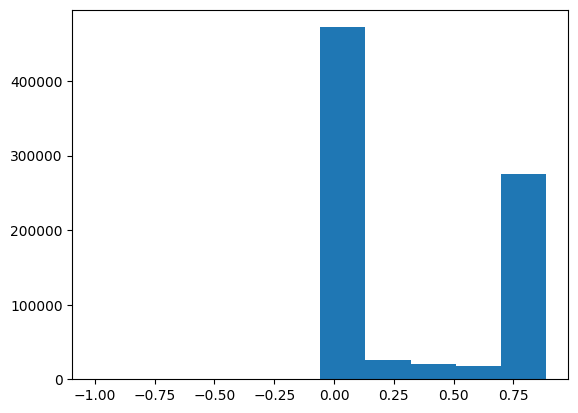

(0.0, 1.0)

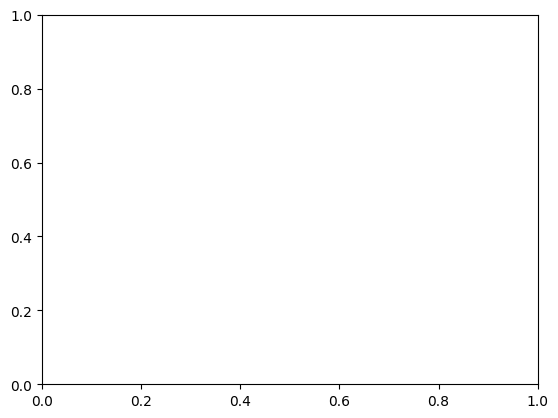

In [47]:
plt.hist(df_to_match["SIAMESE_MATCH_SCORE"])
plt.show()
plt.xlim(0,1)

In [48]:
'''
import tensorflow
from keras_preprocessing.sequence import pad_sequences
# loading Siamese model object
folder_path =  dataiku.Folder("Name Screening notebooks").get_path()
model_path=os.path.join(folder_path,"mixed_val_loss_ind.hdf5")
model_object=tensorflow.keras.models.load_model(model_path,compile=False)

def score_generation(x,y):
    if x=="" or y=="":
        return -1
    else:
        sequences_names_cust=tk.texts_to_sequences([x])
        sequences_names_wl=tk.texts_to_sequences([y])
        cust_pad_names = pad_sequences(sequences_names_cust, maxlen=max_len, padding='post')
        wl_pad_names = pad_sequences(sequences_names_wl, maxlen=max_len, padding='post')
        cust_pad_names = np.array(cust_pad_names)
        wl_pad_names = np.array(wl_pad_names)
        return model_object.predict([cust_pad_names,wl_pad_names])[0][0]

df_to_match.loc[:,["ALL_PARTY_NAMES","ALL_WL_NAMES"]].head()

df_to_match["ORGINAL_NAME_MATCH_SCORE"]=df_to_match[["PARTY_NAMES","WL_NAMES"]].apply(lambda x:score_generation(x[0],x[1]),axis=1)
#df_to_match["ALIAS_MATCH_SCORE"]=df_to_match.loc[:,["ALL_ALIAS_NAMES","WL_NAMES"]].apply(lambda x:max([score_generation(i,j) for i in x[0] for j in x[1]]),axis=1)

#df_to_match["FINAL_NAME_MATCH_SCORE"]=df_to_match[["ORGINAL_NAME_MATCH_SCORE","ALIAS_MATCH_SCORE"]].apply(lambda x: max(x[0],x[1]),axis=1)
'''


'\nimport tensorflow\nfrom keras_preprocessing.sequence import pad_sequences\n# loading Siamese model object\nfolder_path =  dataiku.Folder("Name Screening notebooks").get_path()\nmodel_path=os.path.join(folder_path,"mixed_val_loss_ind.hdf5")\nmodel_object=tensorflow.keras.models.load_model(model_path,compile=False)\n\ndef score_generation(x,y):\n    if x=="" or y=="":\n        return -1\n    else:\n        sequences_names_cust=tk.texts_to_sequences([x])\n        sequences_names_wl=tk.texts_to_sequences([y])\n        cust_pad_names = pad_sequences(sequences_names_cust, maxlen=max_len, padding=\'post\')\n        wl_pad_names = pad_sequences(sequences_names_wl, maxlen=max_len, padding=\'post\')\n        cust_pad_names = np.array(cust_pad_names)\n        wl_pad_names = np.array(wl_pad_names)\n        return model_object.predict([cust_pad_names,wl_pad_names])[0][0]\n\ndf_to_match.loc[:,["ALL_PARTY_NAMES","ALL_WL_NAMES"]].head()\n\ndf_to_match["ORGINAL_NAME_MATCH_SCORE"]=df_to_match[["PARTY

In [49]:
df_to_match=df_to_match[['N_PARTY_WATCHLIST_MATCH_ID','ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES',"PARTY_NAMES","WL_NAMES",'SIAMESE_MATCH_SCORE',"N_MATCH_SCORE"]]
df_to_match[['N_PARTY_WATCHLIST_MATCH_ID','ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES',"SIAMESE_MATCH_SCORE"]].head()

,N_PARTY_WATCHLIST_MATCH_ID,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,SIAMESE_MATCH_SCORE
0,5638786,"[, , , , , , , , , , , , , , , ]","[ AHMAD ALI, , , ]","[, , , , , , AHMAD ALI]",8.834493e-01
1,4605798,"[, , , , , , , , , , , , , , , ]","[HARIYANTO, , , ]","[, , , , , , HARIYANTO]",8.828112e-01
2,7747534,"[, , , , , , , , , , , , , , , ]","[ZHANGA TING, , , ]","[, , , , , , BING ZHANG]",7.588658e-12
3,6550287,"[, , , , , , , , , , , , , , , ]","[ MOHD SADDAM HOSSAIN, , , ]","[, , , , , , MOHD SADDAM HOSSAIN]",8.845971e-01
4,6124513,"[, , , , , , , , , , , , , , , ]","[WANGA XIAODONG, , , ]","[WANG XIAO DONG, , , , , , XIAODONG WANG]",1.023299e-07


### Fuzzy logics

In [50]:
'''
from Fuzzy_logics import graph,soundex_encoding,soundex_lev,soundex_dlev,soundex_lcs,soundex_bigram,\
meta_encode,meta_lev,meta_dlev,metaphone_lcs,metaphone_mlipns,metaphone_strcmp95,metaphone_bisim,\
nysiis_encoding,nysiis_lev,mra,nysiis_dlev,nysiis_lcs,nysiis_bisim,\
nysiis_mlipns,nysiis_strcmp95,\
mra_lev,mra_dlev,mra_bisim,\
phonex_encoding,phonex_lev,phonex_dlev,phonex_lcs,phonex_bisim,\
saps_df,lig_df
'''
from abydos.distance import (IterativeSubString, BISIM, DiscountedLevenshtein, Prefix, LCSseq, MLIPNS, Strcmp95,Levenshtein,
MRA, Editex, SAPS, FlexMetric, JaroWinkler, HigueraMico, Sift4, Eudex, ALINE, Covington, PhoneticEditDistance,SmithWaterman,LIG3)
import jellyfish
from abydos.phonetic import PSHPSoundexFirst, Ainsworth, Phonex , Metaphone
bisim = BISIM() 
pe = Phonex()
ae=Ainsworth()

In [51]:
# NYSIIS
def nysiis_encoding(df):
    df["PARTY_NAMES_nysiis_encode"]=df["PARTY_NAMES"].apply(lambda x: jellyfish.nysiis(x))
    df["WL_NAMES_nysiis_encode"]=df["WL_NAMES"].apply(lambda x: jellyfish.nysiis(x))
    return df
def nysiis_bisim(df):
    return df[["PARTY_NAMES_nysiis_encode","WL_NAMES_nysiis_encode"]].apply(lambda x: bisim.sim(x[0],x[1]),axis=1).values
df_to_match=nysiis_encoding(df_to_match)

# NYSIIS +  BISIM
df_to_match["Final_Nysiis_bisim_score"]=nysiis_bisim(df_to_match)
df_to_match["Final_Nysiis_bisim_score"]=df_to_match[["Final_Nysiis_bisim_score","PARTY_NAMES","WL_NAMES"]].apply(lambda x: -1 if x[1]=="" or x[2]=="" else x[0],axis=1 )

In [52]:
# Phonex + Bisim
def phonex_encoding(df):
    df["PARTY_NAMES_pe_encode"]=df["PARTY_NAMES"].apply(lambda x: pe.encode(x))
    df["WL_NAMES_pe_encode"]=df["WL_NAMES"].apply(lambda x: pe.encode(x))
    return df
def phonex_bisim(df):
    return df[["PARTY_NAMES_pe_encode","WL_NAMES_pe_encode"]].apply(lambda x: bisim.sim(x[0],x[1]),axis=1).values


df_to_match=phonex_encoding(df_to_match)
df_to_match["Final_Phonex_bisim_score"] = phonex_bisim(df_to_match)


In [53]:
# Ainsworth + Bisim
'''
def ainsworth_encoding(df):
    df["PARTY_NAMES_pe_encode"]=df["PARTY_NAMES"].apply(lambda x: ae.encode(x))
    df["WL_NAMES_pe_encode"]=df["WL_NAMES"].apply(lambda x: ae.encode(x))
    return df
def ainsworth_bisim(df):
    return df[["PARTY_NAMES_pe_encode","WL_NAMES_pe_encode"]].apply(lambda x: bisim.sim(x[0],x[1]),axis=1).values


df_to_match=ainsworth_encoding(df_to_match)
df_to_match["Final_Ainsworth_bisim_score"] = ainsworth_bisim(df_to_match)
'''

'\ndef ainsworth_encoding(df):\n    df["PARTY_NAMES_pe_encode"]=df["PARTY_NAMES"].apply(lambda x: ae.encode(x))\n    df["WL_NAMES_pe_encode"]=df["WL_NAMES"].apply(lambda x: ae.encode(x))\n    return df\ndef ainsworth_bisim(df):\n    return df[["PARTY_NAMES_pe_encode","WL_NAMES_pe_encode"]].apply(lambda x: bisim.sim(x[0],x[1]),axis=1).values\n\n\ndf_to_match=ainsworth_encoding(df_to_match)\ndf_to_match["Final_Ainsworth_bisim_score"] = ainsworth_bisim(df_to_match)\n'

In [54]:
print(df_to_match["Final_Nysiis_bisim_score"].unique())
print(df_to_match["Final_Phonex_bisim_score"].unique())
#print(df_to_match["Final_Ainsworth_bisim_score"].unique())

[ 1.          0.6         0.5         0.70588235  0.54166667  0.57692308
  0.92857143  0.7         0.73809524  0.78        0.47058824  0.71428571
  0.61111111  0.91176471  0.91304348  0.65        0.85294118  0.38888889
  0.71052632  0.59090909  0.85        0.4375      0.75        0.64583333
  0.94736842  0.66666667  0.69047619  0.78947368  0.8         0.5952381
  0.475       0.77777778  0.79166667  0.46428571  0.5625      0.45454545
  0.9375      0.7037037   0.31818182  0.39285714  0.82352941  0.775
  0.875       0.64285714  0.42307692  0.45238095  0.72916667  0.70833333
  0.63636364  0.79411765  0.48        0.46875     0.91666667  0.74
  0.89473684  0.88888889  0.78846154  0.73333333  0.41666667  0.26470588
  0.9         0.4         0.83333333  0.89583333  0.68333333  0.38461538
  0.80769231  0.84        0.7173913   0.61538462  0.86842105  0.54545455
  0.60869565  0.58823529  0.88461538  0.93181818  0.81818182  0.94117647
  0.93333333  0.56666667  0.575       0.68181818  0.8125      0

In [55]:
df_to_match.columns

Index(['N_PARTY_WATCHLIST_MATCH_ID', 'ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'PARTY_NAMES', 'WL_NAMES', 'SIAMESE_MATCH_SCORE', 'N_MATCH_SCORE', 'PARTY_NAMES_nysiis_encode', 'WL_NAMES_nysiis_encode', 'Final_Nysiis_bisim_score', 'PARTY_NAMES_pe_encode', 'WL_NAMES_pe_encode', 'Final_Phonex_bisim_score'], dtype='object')

In [56]:
df_to_match2=df_to_match.copy()



In [57]:
df_to_match=df_to_match[['N_PARTY_WATCHLIST_MATCH_ID','ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES',"PARTY_NAMES","WL_NAMES","SIAMESE_MATCH_SCORE", 'Final_Nysiis_bisim_score']]
#df_to_match[[ 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score']]

In [58]:
#df_to_match[[ 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score']].corr()

# Data Integration

In [59]:
path_csv=os.path.join(folder_path,"DOB_results.csv")
df_new_dob=pd.read_csv(path_csv)

In [60]:
df_dob.drop(columns=["N_MATCH_SCORE"],axis=1,inplace=True)

In [81]:
df=pd.merge(df_dob,df_id[['N_PARTY_WATCHLIST_MATCH_ID','ID_score','al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1']],how="left",on="N_PARTY_WATCHLIST_MATCH_ID")
df=pd.merge(df,df_to_match,how='left',on="N_PARTY_WATCHLIST_MATCH_ID")

In [82]:
df["V_RESOLUTION"]=df["V_RESOLUTION"].apply(lambda x: 1 if x in ["TH","THNM"] else 0)
df.shape

(810460, 138)

In [63]:
df.columns

Index(['N_PARTY_WATCHLIST_MATCH_ID', 'V_UCIF_ID', 'V_SCREENING_ID', 'N_WATCHLIST_PROFILE_ID', 'V_WATCHLIST_PARTY_NAME', 'V_INFO_SOURCE', 'V_WL_STATUS_CODE', 'D_DT_OF_SCREENING', 'V_COMMENTS', 'N_WORKFLOW_ID',
       ...
       'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1', 'ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'PARTY_NAMES', 'WL_NAMES', 'SIAMESE_MATCH_SCORE', 'Final_Nysiis_bisim_score'], dtype='object', length=137)

In [83]:
df_2=df[df["SIAMESE_MATCH_SCORE"]!=-1].copy()

theb FP alerts with comments not sounding similiar (117200, 138)


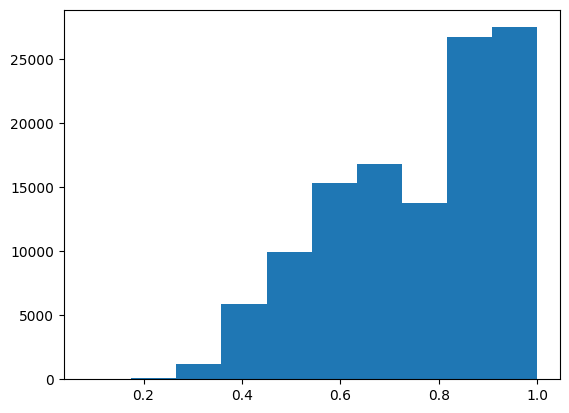

In [85]:
# FH alerts with comments not sounding similiar
df_2["V_COMMENTS"]=df_2["V_COMMENTS"].apply(lambda x: "" if pd.isna(x) else x)
patt_4=re.compile("not sounds similar|not sound similar",re.IGNORECASE)
print("theb FP alerts with comments not sounding similiar",df_2[df_2["V_COMMENTS"].str.contains(patt_4)].shape)
df_sound=df_2[df_2["V_COMMENTS"].str.contains(patt_4)]

plt.hist(df_sound["Final_Nysiis_bisim_score"])
plt.show()

In [86]:
df_s=df_sound[["N_PARTY_WATCHLIST_MATCH_ID","ALL_PARTY_NAMES","ALL_WL_NAMES","PARTY_NAMES","WL_NAMES","ALL_ALIAS_NAMES","V_COMMENTS","SIAMESE_MATCH_SCORE","N_MATCH_SCORE","Final_Nysiis_bisim_score"]]
path_of_not_sounding_simliar=os.path.join(folder_path,"df_sounding_not_similiar.csv")
df_s.to_csv(path_of_not_sounding_simliar)

In [87]:
df_s=df_sound[["N_PARTY_WATCHLIST_MATCH_ID","ALL_PARTY_NAMES","ALL_WL_NAMES","PARTY_NAMES","WL_NAMES","ALL_ALIAS_NAMES","V_COMMENTS","Final_Nysiis_bisim_score"]]
#path_of_not_sounding_simliar=os.path.join(folder_path,"df_sounding_not_similiar.csv")
#df_s.to_csv(path_of_not_sounding_simliar)

# Model Development

In [88]:
df_train=df.copy()
print("shape of train dataset",df_train.shape)

shape of train dataset (810460, 138)


In [89]:
df.columns

Index(['N_PARTY_WATCHLIST_MATCH_ID', 'V_UCIF_ID', 'V_SCREENING_ID', 'N_WATCHLIST_PROFILE_ID', 'N_MATCH_SCORE', 'V_WATCHLIST_PARTY_NAME', 'V_INFO_SOURCE', 'V_WL_STATUS_CODE', 'D_DT_OF_SCREENING', 'V_COMMENTS',
       ...
       'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1', 'ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'PARTY_NAMES', 'WL_NAMES', 'SIAMESE_MATCH_SCORE', 'Final_Nysiis_bisim_score'], dtype='object', length=138)

In [90]:
df_train[df_train["SIAMESE_MATCH_SCORE"]==-1][["PARTY_NAMES","WL_NAMES"]].shape

(15, 2)

In [91]:
df_train=df_train[df_train["SIAMESE_MATCH_SCORE"]!=-1]

In [92]:
df_train["V_RESOLUTION"].unique()

array([0, 1])

In [93]:
val_counts=df_train["V_RESOLUTION"].value_counts()
df_train["V_RESOLUTION"].value_counts()

0    690230
1    120215
Name: V_RESOLUTION, dtype: int64

### Check for imbalance

In [94]:
print("counts of alerts with resolution 0 in train %",df_train["V_RESOLUTION"].value_counts().loc[0]/df_train["V_RESOLUTION"].shape[0])
print("counts of alerts with resolution 1 in train %",df_train["V_RESOLUTION"].value_counts().loc[1]/df_train["V_RESOLUTION"].shape[0])

counts of alerts with resolution 0 in train % 0.8516679108391069
counts of alerts with resolution 1 in train % 0.14833208916089308


 So this is moderately imbalanced , hence no need of doing anything against this imbalancing

### Train-test split

In [95]:
from sklearn.model_selection import train_test_split
X_train=df_train[["FINAL_DOB_MATCH","ID_score","SIAMESE_MATCH_SCORE","N_MATCH_SCORE", 'Final_Nysiis_bisim_score']]
y_train=df_train["V_RESOLUTION"]

In [0]:
df_train.shape

In [0]:
folder_path=dataiku.Folder("Name Screening notebooks").get_path()

train_dataset_path_2=os.path.join(folder_path,"Final_training_dataset_2(1).csv")
df_train.to_csv(train_dataset_path_2)

In [99]:
df_train[(df_train["FINAL_DOB_MATCH"]== -1) & (df_train["ID_score"]==-1) ][["V_RESOLUTION","V_COMMENTS","Final_Nysiis_bisim_score"]]

,V_RESOLUTION,V_COMMENTS,Final_Nysiis_bisim_score
1,0,"Mismatch Profile\nAccording to World Check, Watchperson is a Head of Center for Mineral, Coal and Geothermal Resources at Geological Agency of the Ministry of Energy and Mineral Resources (Apr 2022 - ). Meanwhile, customer is an AGRICULTURAL, FORESTRY, FARMING AND FISHERY LABOURERS for SRI WALIS (M) SDN BHD as per UCO. Thus, it is highly unlikely that they are the same person.",1.000000
5,0,Mismatch Full Legal Name – Name Does Not Sound Similar,0.705882
6,0,Mismatch Full Legal Name_Name does not sound similar,0.541667
8,0,"Mismatch Profile. Customer work as Manufacturing Labourer as per UCO meanwhile WL work as Deputy Secretary (Director) to Bangladesh Food Safety Authority as per world check. Hence, It is Highly Unlikely Customer and Watchlist are the same person because of their profile.",1.000000
9,0,"Mismatch Profile. Customer work as MINING AND CONSTRUCTION LABOURERS as per UCO meanwhile WL work as Deputy Secretary (placed under) to Local Govt Division as per world check. Hence, It is Highly Unlikely Customer and Watchlist are the same person because of their profile.",1.000000
...,...,...,...
810286,1,NaN,0.673913
810292,1,NaN,0.666667
810307,1,NaN,1.000000
810337,0,NaN,0.750000


In [0]:
path_of_csv=os.path.join(folder_path,"comments_where_id_dob_absent.csv")
df_train[(df_train["FINAL_DOB_MATCH"]== -1) & (df_train["ID_score"]==-1) & (df_train["Final_Nysiis_bisim_score"]<=0.75) ]["V_COMMENTS"].value_counts().to_csv(path_of_csv)

In [0]:
df_train[(df_train["FINAL_DOB_MATCH"]== -1) & (df_train["ID_score"]==-1) & (df_train["Final_Nysiis_bisim_score"]<=0.75) ].shape

In [101]:
X_unseen=df_test[["FINAL_DOB_MATCH","ID_score","SIAMESE_MATCH_SCORE","N_MATCH_SCORE", 'Final_Nysiis_bisim_score']]
#df_test["V_RESOLUTION"]=df_test["V_RESOLUTION"].apply(lambda x:1 if x in ["TH","THNM"] else 0)
y_unseen=df_test["V_RESOLUTION"]

In [0]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=9)

In [102]:
df_test["V_RESOLUTION"].value_counts()

0    9126
1     874
Name: V_RESOLUTION, dtype: int64

### Classification model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
# import lightgbm
import catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,classification_report,precision_score,recall_score,roc_curve,roc_auc_score

Overall the metric to be checked is f-1 score for target value 1 becoz we need to keep good accuracy on both resolutions.But specifically to analyze how many fp have been reduced we need to see
the precision for target variable 1 (maximizing precision for target var 1 is equivalent to maximzing recall for target value 0).


In [0]:
'''
classifier_SVM = SVC(kernel='rbf',random_state=0)
classifier_SVM.fit(X_train,y_train)
y_predict_train=classifier_SVM.predict(X_train)
y_predict=classifier_SVM.predict(X_test)
y_predict_2=classifier_SVM.predict(X_test_2)
print("results from SVM model, Train data ")
print(classification_report(y_train,y_predict_train))
print("results from SVM model,  Test data")
print(classification_report(y_test,y_predict))
print("results from SVM model, Unseen data")
print(classification_report(y_test_2,y_predict_2))
score=cross_val_score(classifier_SVM,X_train,y_train,cv=5,scoring='f1_macro')
print("cross_val_f1_score meand & std. deviation",score.mean(),score.std())
results["SVM"]=f1_score(y_test_2,y_predict_2)
'''

### Model function

In [127]:
results={}


for model_name in ["LG","Random forest","LightGBM","XG Boost"]:
    if model_name=="LG":
        classifier_lg=LogisticRegression(class_weight="balanced",random_state=0)
        classifier_lg.fit(X_train,y_train)
        y_predict_train=classifier_lg.predict(X_train)
       # y_predict=classifier_lg.predict(X_test)
        y_predict_2=classifier_lg.predict(X_unseen)
        print("results from Logistic Regression model on train data")
        print(classification_report(y_train,y_predict_train))
       # print("results from Logistic Regression model on test data")
       # print(classification_report(y_train,y_predict_train))
        print("results from Logistic Regression model on Unseen data")
        print(classification_report(y_unseen,y_predict_2))
     #   score=cross_val_score(classifier_lg,X_train,y_train,cv=5,scoring='f1')
     #   print("cross_val_f1_score meand & std. deviation",score.mean(),score.std())
     #   results["LG"]=f1_score(y_unseen,y_predict_2)   
#     if model_name=="LightGBM":
#         classifier_lgbm=LGBMClassifier(random_state=1,verbose_eval=False)
#         classifier_lgbm.fit(X_train,y_train)
#         y_predict_train=classifier_lgbm.predict(X_train)
#        # y_predict=classifier_lgbm.predict(X_test)
#         y_predict_2=classifier_lgbm.predict(X_unseen)
#         print("results from LightGBM model, Train data ")
#         print(classification_report(y_train,y_predict_train))
#     #    print("results from LightGBM model,  Test data")
#     #    print(classification_report(y_test,y_predict))
#         print("results from LightGBM model, Unseen data")
#         print(classification_report(y_unseen,y_predict_2))
#    #      score=cross_val_score(classifier_lgbm,X_train,y_train,cv=5,scoring='f1')
#    #     print("cross_val_f1_score meand & std. deviation",score.mean(),score.std())
#    #     results["LightGBM"]=f1_score(y_unseen,y_predict_2)        
    elif model_name =="Random forest":
        # Random forest 

        classifier_RF=RandomForestClassifier(max_features=None,random_state=0)
        classifier_RF.fit(X_train, y_train)
        y_predict_train=classifier_RF.predict(X_train)
        #y_predict=classifier_RF.predict(X_test)
        y_predict_2=classifier_RF.predict(X_unseen)
        print("results from RF model, Train data ")
        print(classification_report(y_train,y_predict_train))
   #     print("results from RF model,  Test data")
   #     print(classification_report(y_test,y_predict))
        print("results from RF model, Unseen data")
        print(classification_report(y_unseen,y_predict_2))
   #     score=cross_val_score(classifier_RF,X_train,y_train,cv=5,scoring='f1_macro')
   #     print("cross_val_f1_score meand & std. deviation",score.mean(),score.std())
   #     results["RF"]=f1_score(y_unseen,y_predict_2)
       
    # XGBoost
    elif model_name=="XG Boost":
        classifier_XGB = xgb.XGBClassifier(random_state=0)
        classifier_XGB.fit(X_train, y_train)
        y_predict_train=classifier_XGB.predict(X_train)
        #y_predict=classifier_XGB.predict(X_test)
        y_predict_2=classifier_XGB.predict(X_unseen)
        print("Results from XGBoost model, Train data ")
        print(classification_report(y_train,y_predict_train))
  #      print("results from XG Boost model,  Test data")
  #      print(classification_report(y_test,y_predict))
        print("results from XG Boost model, Unseen data")
        print(classification_report(y_unseen,y_predict_2))
  #     score=cross_val_score(classifier_XGB,X_train,y_train,cv=5,scoring='f1')
  #      print("cross_val_f1_score meand & std. deviation",score.mean(),score.std())        
  #      results["XGBoost"]=f1_score(y_unseen,y_predict_2)
        



results from Logistic Regression model on train data
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93    690230
         1.0       0.57      0.88      0.69    120215

    accuracy                           0.88    810445
   macro avg       0.77      0.88      0.81    810445
weighted avg       0.92      0.88      0.89    810445

results from Logistic Regression model on Unseen data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9126
           1       0.39      0.49      0.44       874

    accuracy                           0.89     10000
   macro avg       0.67      0.71      0.69     10000
weighted avg       0.90      0.89      0.89     10000

results from RF model, Train data 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    690230
         1.0       0.99      0.91      0.95    120215

    accuracy                           0

In [111]:
X_train

,FINAL_DOB_MATCH,ID_score,SIAMESE_MATCH_SCORE,N_MATCH_SCORE,Final_Nysiis_bisim_score
0,0.0,-1.0,8.834493e-01,100.0,1.000000
1,-1.0,-1.0,8.828112e-01,100.0,1.000000
2,0.8,-1.0,7.588658e-12,90.0,0.600000
3,0.5,-1.0,8.845971e-01,100.0,1.000000
4,0.5,-1.0,1.023299e-07,100.0,0.500000
...,...,...,...,...,...
810455,0.6,0.0,4.570103e-01,93.0,0.863636
810456,1.0,1.0,8.840397e-01,100.0,1.000000
810457,1.0,1.0,8.825110e-01,100.0,1.000000
810458,1.0,1.0,8.841233e-01,100.0,1.000000


In [0]:
'''
# LightGBM
predicted_proba=classifier_lgbm.predict_proba(X_train)
FPR, TPR, proba = roc_curve(y_train, predicted_proba[:, -1])
optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
thresh_dict["LightGBM"]=optimal_proba_cutoff
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in classifier_lgbm.predict_proba(X_test)[:, -1]]
print(classification_report(y_test,roc_predictions))
plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_train, predicted_proba[:, -1])}") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".")
plt.title("LightGBM ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Adaboost
predicted_proba=classifier_ada.predict_proba(X_train)
FPR, TPR, proba = roc_curve(y_train, predicted_proba[:, -1])
optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
thresh_dict["Adaboost"]=optimal_proba_cutoff
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in classifier_lgbm.predict_proba(X_test)[:, -1]]
print(classification_report(y_test,roc_predictions))
predicted_proba=classifier_ada.predict_proba(X_train)
FPR, TPR, thres = roc_curve(y_train, predicted_proba[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_train, predicted_proba[:, -1])}") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".")
plt.title("Adaboost ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()



#CatBoost 
predicted_proba=classifier_cat.predict_proba(X_train)
FPR, TPR, thres = roc_curve(y_train, predicted_proba[:, -1])
optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
thresh_dict["CatBoost"]=optimal_proba_cutoff
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in classifier_lgbm.predict_proba(X_test)[:, -1]]
print(classification_report(y_test,roc_predictions))


plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_train, predicted_proba[:, -1])}") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".")
plt.title("CatBoost ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()
'''

In [112]:
#Nueral Networks
import tensorflow as tf

In [113]:
X_train.info()
y_train=df_train["V_RESOLUTION"].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810445 entries, 0 to 810459
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   FINAL_DOB_MATCH           810445 non-null  float64
 1   ID_score                  810445 non-null  float64
 2   SIAMESE_MATCH_SCORE       810445 non-null  float64
 3   N_MATCH_SCORE             810445 non-null  float64
 4   Final_Nysiis_bisim_score  810445 non-null  float64
dtypes: float64(5)
memory usage: 37.1 MB


In [114]:
X_2,X_val,y_2,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=1)

In [115]:
from tensorflow.keras.callbacks import (ModelCheckpoint, TensorBoard, ReduceLROnPlateau,
                                        CSVLogger, EarlyStopping)
folder_path=dataiku.Folder("Name Screening notebooks").get_path()

In [116]:
ann=tf.keras.models.Sequential()
# hidden layers-2 with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

# output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# compile
ann.compile( optimizer="adam",loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.F1Score(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

keras_callbacks   = [\
      EarlyStopping(monitor='val_loss', min_delta =0.01, patience=25, mode='min'),\
      ReduceLROnPlateau(monitor='val_loss', factor=0.75,patience=10, min_lr=0.000001),\
      ModelCheckpoint(filepath=os.path.join(folder_path,"nn_challenger_model.hdf5"),
                      monitor='val_loss',
                      verbose=1, 
                      save_best_only=True,
                      save_weights_only=False,
                      mode='min',
                      )]

ann.fit(X_2,y_2,batch_size=30,epochs=10,class_weight={0:0.4,1:0.6},validation_data=(X_val,y_val))


Epoch 1/10
21612/21612 [==============================] - 48s 2ms/step - loss: 0.0621 - f1_score: 0.2582 - precision_1: 0.9916 - recall_1: 0.8326 - val_loss: 0.0926 - val_f1_score: 0.2588 - val_precision_1: 0.9919 - val_recall_1: 0.8579
Epoch 2/10
21612/21612 [==============================] - 44s 2ms/step - loss: 0.0493 - f1_score: 0.2582 - precision_1: 0.9919 - recall_1: 0.8603 - val_loss: 0.1031 - val_f1_score: 0.2588 - val_precision_1: 0.9918 - val_recall_1: 0.8579
Epoch 3/10
21612/21612 [==============================] - 43s 2ms/step - loss: 0.0479 - f1_score: 0.2582 - precision_1: 0.9912 - recall_1: 0.8657 - val_loss: 0.0925 - val_f1_score: 0.2588 - val_precision_1: 0.9897 - val_recall_1: 0.8736
Epoch 4/10
21612/21612 [==============================] - 46s 2ms/step - loss: 0.0471 - f1_score: 0.2582 - precision_1: 0.9911 - recall_1: 0.8693 - val_loss: 0.0872 - val_f1_score: 0.2588 - val_precision_1: 0.9897 - val_recall_1: 0.8737
Epoch 5/10
21612/21612 [============================

In [117]:
print("Classification report on train dataset  using NN")
y_predict_train=[1 if i>0.5 else 0 for i in ann.predict(X_train)]
print(classification_report(y_train,y_predict_train))
print("Classification report on test dataset using NN")
y_predict=[1 if i>0.5 else 0 for i in ann.predict(X_unseen)]
print(classification_report(y_unseen,y_predict))

Classification report on train dataset  using NN
25327/25327 [==============================] - 29s 1ms/step
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    690230
         1.0       0.99      0.87      0.93    120215

    accuracy                           0.98    810445
   macro avg       0.98      0.94      0.96    810445
weighted avg       0.98      0.98      0.98    810445

Classification report on test dataset using NN
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9126
           1       0.98      0.47      0.63       874

    accuracy                           0.95     10000
   macro avg       0.96      0.73      0.80     10000
weighted avg       0.95      0.95      0.94     10000



In [118]:
# how to overcome overfitting -  addition of drop-out layer, weights & parameter regularizer -  keras_regualrizer
# Bayesian optimization

import keras_tuner

def build_model(hp):
    ann_2=tf.keras.models.Sequential()
    # hidden layers-2 with 6 neurons
    unit_val=hp.Choice("units",values=[4,5,6])
    ann_2.add(tf.keras.layers.Dense(units=unit_val,activation="relu",kernel_regularizer='l1_l2'))
    ann_2.add(tf.keras.layers.Dense(units=unit_val,activation="relu"))
    ann_2.add(tf.keras.layers.Dropout(0.2))
    # output layer
    ann_2.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
    learning_rate_val=hp.Choice("learning_rate",values=[1e-2, 1e-3, 1e-4])
    # compile
    ann_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_val),loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.F1Score(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
    return ann_2


In [119]:
X_2,X_val,y_2,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=1)

In [120]:
tuner=keras_tuner.BayesianOptimization(build_model,objective='val_loss',max_trials=5)
tuner.search(X_2,y_2,epochs=5,validation_data=(X_val,y_val))


Reloading Tuner from ./untitled_project/tuner0.json


In [121]:
model=build_model(tuner.get_best_hyperparameters()[0])
history=model.fit(X_2,y_2,callbacks=keras_callbacks,class_weight={0:0.4,1:0.6},validation_data=(X_val,y_val),epochs=10,batch_size=32)

Epoch 1/10
20261/20262 [============================>.] - ETA: 0s - loss: 0.2239 - f1_score: 0.2582 - precision_2: 0.6633 - recall_2: 0.4724
Epoch 1: val_loss improved from inf to 0.18661, saving model to /app/dataiku_filesystem_managed/NAMESCREENING_1/X71uZTip/nn_challenger_model.hdf5
20262/20262 [==============================] - 48s 2ms/step - loss: 0.2239 - f1_score: 0.2582 - precision_2: 0.6633 - recall_2: 0.4725 - val_loss: 0.1866 - val_f1_score: 0.2588 - val_precision_2: 0.9918 - val_recall_2: 0.8587 - lr: 1.0000e-04
Epoch 2/10
20243/20262 [============================>.] - ETA: 0s - loss: 0.1158 - f1_score: 0.2582 - precision_2: 0.9921 - recall_2: 0.6851
Epoch 2: val_loss improved from 0.18661 to 0.14784, saving model to /app/dataiku_filesystem_managed/NAMESCREENING_1/X71uZTip/nn_challenger_model.hdf5
20262/20262 [==============================] - 42s 2ms/step - loss: 0.1158 - f1_score: 0.2582 - precision_2: 0.9922 - recall_2: 0.6852 - val_loss: 0.1478 - val_f1_score: 0.2588 - 

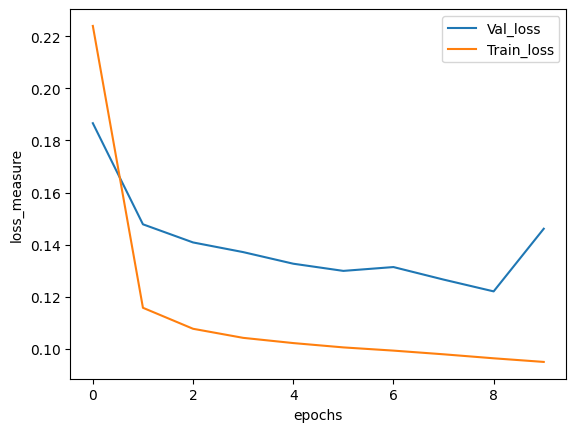

In [122]:
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt 
history.params
history.history.keys()
plt.plot(history.history["val_loss"],label="Val_loss")
plt.plot(history.history["loss"],label="Train_loss")
plt.xlabel("epochs")
plt.ylabel("loss_measure")
plt.legend()

In [123]:
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
model_path_2=os.path.join(folder_path,"nn_challenger_model.hdf5")
model=tf.keras.models.load_model(model_path_2,compile=False)

In [124]:

print("Classification report on train dataset  using NN")
y_predict_train=[1 if i>0.5 else 0 for i in model.predict(X_train)]
print(classification_report(y_train,y_predict_train))
print("Classification report on test dataset using NN")
y_predict=[1 if i>0.5 else 0 for i in model.predict(X_unseen)]
print(classification_report(y_unseen,y_predict))

Classification report on train dataset  using NN
25327/25327 [==============================] - 27s 1ms/step
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    690230
         1.0       0.99      0.86      0.92    120215

    accuracy                           0.98    810445
   macro avg       0.98      0.93      0.95    810445
weighted avg       0.98      0.98      0.98    810445

Classification report on test dataset using NN
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9126
           1       0.99      0.47      0.63       874

    accuracy                           0.95     10000
   macro avg       0.97      0.73      0.80     10000
weighted avg       0.95      0.95      0.94     10000



In [0]:
# ROC curve on neural network
from sklearn.metrics import roc_curve
y_pred_nn=model.predict(X_2)
FPR,TPR,thresh=roc_curve(y_2,y_pred_nn)
optimal_proba_cutoff_nn=sorted(list(zip(np.abs(TPR-FPR),thresh)),key=lambda i: i[0],reverse=True)[0][1]
print("opt_thresh_prob",optimal_proba_cutoff_nn)

#print(classification_report(y_test,roc_predictions))
plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_2, y_pred_nn)}") # plot random curve

plt.plot(FPR, TPR, marker=".")
plt.title("NN ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [131]:
# Results from NN after tuning & using optimal threshold on unseen data - will discard it from choosing a champion model
y_unseen_pred=[1 if i>optimal_proba_cutoff_nn else 0 for i in model.predict(X_unseen)]
print(classification_report(y_unseen,y_unseen_pred))
y_pred_train=[1 if i>optimal_proba_cutoff_nn else 0 for i in model.predict(X_train)]
print(classification_report(y_train,y_pred_train))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9126
           1       0.99      0.47      0.63       874

    accuracy                           0.95     10000
   macro avg       0.97      0.73      0.80     10000
weighted avg       0.95      0.95      0.95     10000

25327/25327 [==============================] - 27s 1ms/step
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    690230
         1.0       0.99      0.87      0.93    120215

    accuracy                           0.98    810445
   macro avg       0.98      0.94      0.96    810445
weighted avg       0.98      0.98      0.98    810445



### Hyperparameter tuning

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
#Logistic Regression
classifier_lg=LogisticRegression(random_state=0)
print(classifier_lg.get_params())
params=[{"solver":["lbfgs", "liblinear", "newton-c  g"],"class_weight":["balanced",{0:0.4,1:0.6}],"penalty":["l1","l2","elasticnet"]}]

cv_grid_lg=GridSearchCV(classifier_lg,param_grid=params,scoring="f1",cv=10,n_jobs=-1)
cv_grid_lg.fit(X_train,y_train)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {0: 0.4, 1: 0.6}],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'newton-c  g']}],
             scoring='f1')

In [135]:
# Randaom Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#'criterion':['gini','entropy']
#"max_depth":[4,5,6],"class_weight":["balanced",{0:0.40,1:0.6}]
classifier_RF=RandomForestClassifier()
print(classifier_RF.get_params())
params=[{"n_estimators":[100,200],"min_samples_split":[3,4,5],"max_features":[None]}]
cv_grid_rf=GridSearchCV(classifier_RF,param_grid=params,scoring="f1",n_jobs=-1,cv=5)
cv_grid_rf.fit(X_train,y_train)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': [None],
                          'min_samples_split': [3, 4, 5],
                          'n_estimators': [100, 200]}],
             scoring='f1')

In [136]:
# XGboost
from xgboost import XGBClassifier
classifier_XGB=XGBClassifier()
params=[{"n_estimators":[50,75,100],"max_depth":[3,4,5,6],"learning_rate":[0.001,0.01,0.1],'reg_alpha':[1,5,10],'reg_lambda':[0,5,10],"class_weight":["balanced",{0:0.4,1:0.6}]}]
cv_grid_xgb=GridSearchCV(classifier_XGB,param_grid=params,scoring="f1",cv=10,n_jobs=-1)


In [138]:
cv_grid_xgb.fit(X_train,y_train)
print(cv_grid_xgb.best_score_,cv_grid_xgb.best_params_)


Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/app/dataiku/design/code-envs/python/py_39_tm_ns_2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 602, in run
    self.process_result_item(result_item)
  File "/app/dataiku/design/code-envs/python/py_39_tm_ns_2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 759, in process_result_item
    executor._adjust_process_count()
  File "/app/dataiku/design/code-envs/python/py_39_tm_ns_2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 1209, in _adjust_process_count
    p.start()
  File "/usr/local/lib/python3.9/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/app/dataiku/design/code-envs/python/py_39_tm_ns_2/lib/python3.9/site-packages/joblib/externals/loky/backend/process.py", line 45, i

KeyboardInterrupt: 

In [0]:
# # Light GBM
# from sklearn.model_selection import GridSearchCV

# from lightgbm import LGBMClassifier

'''
classifier_lgbm=LGBMClassifier()
#,"learning_rate":[0.1,0.001,0.005]
#"reg_alpha":[0,1,5],"reg_lambda":[1,5]
params=[{"boosting_type":["goss"], "n_estimators":[50,75,100],"max_depth":[4,5,6],\
"class_weight":["balanced",{1:0.6,0:0.4}]}]
cv_grid_lgbm=GridSearchCV(classifier_lgbm,param_grid=params,scoring="f1",n_jobs=-1,cv=10)
cv_grid_lgbm.fit(X_train,y_train)
print(cv_grid_lgbm.best_score_,cv_grid_lgbm.best_params_)
'''

### Re-training

In [0]:
cv_grid_lg.best_params_

In [0]:
# Logistic
print(list(cv_grid_lg.best_params_.values()))
classifier_lg=LogisticRegression(**cv_grid_lg.best_params_)
classifier_lg.fit(X_train,y_train)

In [0]:
classifier_lg.predict(X_unseen)
y_unseen

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_train,classifier_lg.predict(X_train)))
print(classification_report(y_unseen,classifier_lg.predict(X_unseen)))

In [0]:
# Saving_model object LG
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
file_path = os.path.join(folder_path,'Logistic_model_tuned.sav')
pickle.dump(classifier_lg, open(file_path, 'wb'))
 

In [0]:
# Random forest
classifier_RF=RandomForestClassifier(**cv_grid_rf.best_params_)
classifier_RF.fit(X_train,y_train)

In [0]:
print(classification_report(y_train,classifier_RF.predict(X_train)))
print(classification_report(y_unseen,classifier_RF.predict(X_unseen)))

In [0]:
# Saving_model object RF
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
file_path = os.path.join(folder_path,'Random_forest_tuned.sav')
pickle.dump(classifier_RF, open(file_path, 'wb'))

In [0]:
# XGBoost
cv_grid_xgb.best_params_={'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75, 'reg_alpha': 5, 'reg_lambda': 0}
re_xgb=XGBClassifier(**cv_grid_xgb.best_params_)
re_xgb.fit(X_train,y_train)


In [0]:
print(classification_report(y_train,re_xgb.predict(X_train)))
print(classification_report(y_unseen,re_xgb.predict(X_unseen)))

In [0]:
# Saving_model object XGB
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
file_path = os.path.join(folder_path,'Classifier_xgb_tuned.sav')
pickle.dump(re_xgb, open(file_path, 'wb'))

In [0]:
# #lightgbm
# classifier_lgbm=LGBMClassifier(random_state=1,verbose_eval=False)
# classifier_lgbm.fit(X_train,y_train)
# '''
# classifier_lgbm=LGBMClassifier(**cv_grid_lgbm.best_params_)
# classifier_lgbm.fit(X_train,y_train)
# '''

In [0]:
# print(classification_report(y_train,classifier_lgbm.predict(X_train)))
# print(classification_report(y_unseen,classifier_lgbm.predict(X_unseen))

In [0]:
# # Saving_model object LGBM
# folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# file_path = os.path.join(folder_path,'Light_GBM_tuned.sav')
# pickle.dump(classifier_lgbm, open(file_path, 'wb'))

### Prediction on Train

In [0]:
# model prediction
df_train["V_PREDICTION"]=re_xgb.predict(X_train)

In [0]:
train_dataset_path_2=os.path.join(folder_path,"Final_training_dataset_2.csv")
df_train.to_csv(train_dataset_path_2)

In [0]:
df_train.shape

### ROC curve

In [0]:
thresh_dict={}
# Logistic Regression
predicted_proba=classifier_lg.predict_proba(X_unseen)
FPR, TPR, proba = roc_curve(y_unseen, predicted_proba[:, -1])
optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
thresh_dict["LG"]=optimal_proba_cutoff
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in classifier_lg.predict_proba(X_unseen)[:, -1]]
print("LG threshold :", optimal_proba_cutoff)
plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_unseen, predicted_proba[:, -1])}") # plot random curve
plt.plot(FPR, TPR, marker=".")
plt.title("LG ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()


#Random forest
predicted_proba=classifier_RF.predict_proba(X_unseen)
FPR, TPR, thres = roc_curve(y_unseen, predicted_proba[:, -1])
optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
thresh_dict["Random forest"]=optimal_proba_cutoff

print("RF threshold :", optimal_proba_cutoff)
plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_unseen, predicted_proba[:, -1])}") # plot random curve
plt.plot(FPR, TPR, marker=".")
plt.title("Random Forest ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()
# # LightGBM
# predicted_proba=classifier_lgbm.predict_proba(X_unseen)
# FPR, TPR, proba = roc_curve(y_unseen, predicted_proba[:, -1])
# optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
# thresh_dict["LightGBM"]=optimal_proba_cutoff
# print("Light GBM :", optimal_proba_cutoff)
# plt.figure()
# plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_unseen, predicted_proba[:, -1])}") # plot random curve
# plt.plot(FPR,TPR, marker=".")
# plt.title("LightGBM ROC Curve")
# plt.ylabel("True Positive Rate")
# plt.xlabel("False Positive Rate")
# plt.legend(loc="lower right")
# plt.show()

#XG Boost
predicted_proba=re_xgb.predict_proba(X_unseen)
FPR, TPR, thres = roc_curve(y_unseen, predicted_proba[:, -1])
optimal_proba_cutoff = sorted(list(zip(np.abs(TPR - FPR), proba)), key=lambda i: i[0], reverse=True)[0][1]
thresh_dict["XG Boost"]=optimal_proba_cutoff
print("XG Boost threshold :", optimal_proba_cutoff)
plt.figure()
plt.plot([0,1], [0,1], linestyle="--",label=f"AUC = {roc_auc_score(y_unseen, predicted_proba[:, -1])}") # plot random curve
plt.plot(FPR, TPR, marker=".")
plt.title("XGBoost ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()




### PRC curve

In [0]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
import matplotlib.pyplot as plt
thres_dict_prc ={} 

# Logistic Regression
Pre,Rec,th=precision_recall_curve(y_unseen,probas_pred=classifier_lg.predict_proba(X_unseen)[:,-1])
optimal_proba_cutoff = sorted(list(zip(np.abs(Pre - Rec),th)), key=lambda i: i[0], reverse=True)[0][1]
thres_dict_prc["LG"]=optimal_proba_cutoff
print("LG threshold :", optimal_proba_cutoff)
plt.figure()
disp = PrecisionRecallDisplay(precision=Pre, recall=Rec)
disp.plot()
#plt.plot(Pre, Rec, marker=".")
#plt.title("LG ROC Curve")
#plt.ylabel("True Positive Rate")
#plt.xlabel("False Positive Rate")
#plt.legend(loc="lower right")
#plt.show()
plt.show()


# Random Forest
Pre,Rec,th=precision_recall_curve(y_unseen,classifier_RF.predict_proba(X_unseen)[:,-1])
optimal_proba_cutoff = sorted(list(zip(np.abs(Pre - Rec), th)), key=lambda i: i[0], reverse=True)[0][1]
thres_dict_prc["RF"]=optimal_proba_cutoff
print("RF threshold :", optimal_proba_cutoff)
plt.figure()
disp = PrecisionRecallDisplay(precision=Pre, recall=Rec)
disp.plot()
#plt.plot(Pre, Rec, marker=".")



# XGBoost
Pre,Rec,th=precision_recall_curve(y_unseen,probas_pred=re_xgb.predict_proba(X_unseen)[:,-1])
optimal_proba_cutoff = sorted(list(zip(np.abs(Pre - Rec),th)), key=lambda i: i[0], reverse=True)[0][1]
thres_dict_prc["XGB"]=optimal_proba_cutoff
print("XGB threshold :", optimal_proba_cutoff)
plt.figure()
disp = PrecisionRecallDisplay(precision=Pre, recall=Rec)
disp.plot()
#plt.plot(Pre, Rec, marker=".")
plt.show()




# # LightGBM
# Pre,Rec,th=precision_recall_curve(y_unseen,probas_pred=classifier_lgbm.predict_proba(X_unseen)[:,-1])
# optimal_proba_cutoff = sorted(list(zip(np.abs(Pre - Rec),th)), key=lambda i: i[0], reverse=True)[0][1]
# thres_dict_prc["LGBM"]=optimal_proba_cutoff
# print("LGBM threshold :", optimal_proba_cutoff)
# plt.figure()
# disp = PrecisionRecallDisplay(precision=Pre, recall=Rec)
# disp.plot()
# #plt.plot(Pre, Rec, marker=".")
# plt.show()


In [0]:
class model_prob:
    def __init__(self):
        self.dict=thresh_dict
prob=model_prob()
file_path=os.path.join(folder_path,"opt_thres.sav")
pickle.dump(prob,open(file_path,"wb"))
x=pickle.load(open(file_path,"rb"))

In [0]:
x.dict

# CHAMPION MODEL SELECTION

In [0]:


print("LG")
y_unseen_pred=[1 if i> thresh_dict["LG"] else 0 for i in  classifier_lg.predict_proba(X_unseen)[:, 1] ]
y_train_pred=[1 if i> thresh_dict["LG"] else 0 for i in  classifier_lg.predict_proba(X_train)[:, 1]]

print(classification_report(y_unseen,y_unseen_pred))
print("RF")
y_unseen_pred=[1 if i> thresh_dict["Random forest"] else 0 for i in  classifier_RF.predict_proba(X_unseen)[:, 1] ]
y_train_pred=[1 if i> thresh_dict["Random forest"] else 0 for i in  classifier_lg.predict_proba(X_train)[:, 1]]


print(classification_report(y_unseen,y_unseen_pred))
print("LGBM")
y_unseen_pred=[1 if i> thresh_dict["LightGBM"] else 0 for i in  classifier_lgbm.predict_proba(X_unseen)[:, 1] ]
y_train_pred=[1 if i> thresh_dict["LightGBM"] else 0 for i in  classifier_lg.predict_proba(X_train)[:, 1]]


print(classification_report(y_unseen,y_unseen_pred))
print("XGB")
y_unseen_pred=[1 if i> thresh_dict["XG Boost"] else 0 for i in  re_xgb.predict_proba(X_unseen)[:, 1] ]
y_train_pred=[1 if i> thresh_dict["XG Boost"] else 0 for i in  classifier_lg.predict_proba(X_train)[:, 1]]

print(classification_report(y_unseen,y_unseen_pred))




In [0]:
# save the model to disk
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
file_path = os.path.join(folder_path,'finalized_model_(siamese & fuzzy(only_orginal_name).sav')
pickle.dump(re_xgb, open(file_path, 'wb'))
 



In [0]:
X_train.columns

# Feature Importance

In [0]:
X_4=X_train[["FINAL_DOB_MATCH","ID_score","SIAMESE_MATCH_SCORE","N_MATCH_SCORE", 'Final_Nysiis_bisim_score']]
y_4=df_train[["V_RESOLUTION"]]
cv_grid_xgb.best_params_={'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75, 'reg_alpha': 5, 'reg_lambda': 0}
re_xgb=XGBClassifier(**cv_grid_xgb.best_params_)





re_xgb.fit(X_4,y_4)

fi_4 = pd.DataFrame({'Feature_names':X_4.columns,'Weight_Imp':list(re_xgb.get_booster().get_score(importance_type="weight").values())})
fi_4["Percent_Weight_Imp"]=[i/ sum(fi_4["Weight_Imp"].values) for i in fi_4["Weight_Imp"]]
fi_4.sort_values(by='Weight_Imp',ascending=False,inplace=True)
fig,ax=plt.subplots(nrows=2,ncols=1)
plt.sca(ax[0])
ax[0].bar(fi_4["Feature_names"],fi_4["Weight_Imp"])
plt.rc("xtick",labelsize=8)
plt.xticks(rotation=45)

plt.sca(ax[1])
ax[1].bar(fi_4["Feature_names"],fi_4["Percent_Weight_Imp"])
plt.rc("xtick",labelsize=8)
plt.xticks(rotation=45)

plt.gcf().set_size_inches(15, 5)
fig.tight_layout()
plt.show()


In [0]:
fi_4[["Feature_names",'Weight_Imp',"Percent_Weight_Imp"]]

# Feature Attribution

In [0]:
DOR : Used Lime for feature attribution on test data where we get feature and respective scores contributing in resolution.
    Removed the features whoose scores are negative & those features if dat for them is absent in V_REASON columns

In [0]:
model_path=os.path.join(folder_path,"Classifier_xgb_tuned.sav")
re_xgb=pickle.load(open(model_path,"rb"))

In [0]:
import lime
import lime.lime_tabular
import sklearn
from __future__ import print_function
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [0]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X_train.columns, class_names=y_train.unique(), discretize_continuous=False)

In [0]:
import numpy as np

exp = explainer.explain_instance(X_unseen.loc[0], re_xgb.predict_proba,num_features=5,  top_labels=2)

In [0]:
exp.show_in_notebook()

In [0]:
exp.as_pyplot_figure(label=1)

In [0]:
exp.as_map()

In [0]:
exp.as_list()

In [0]:
#[X_unseen.iloc[k,:].apply(lambda x: explainer.explain_instance(x, re_xgb.predict_proba, num_features=4, top_labels=2).as_list(label=int(df_test["V_PREDICTION"][k]))) for k in X_unseen.index ]
y_unseen_pred=re_xgb.predict(X_unseen)
df_test["V_PREDICTION"]=[1 if i> x.dict["XG Boost"] else 0 for i in y_unseen_pred]

In [0]:
#df.loc[:,"Results"]=""
df_test.loc[:,"Results"]=[X_unseen.iloc[k:k+1,:].apply(lambda x: explainer.explain_instance(x, re_xgb.predict_proba, num_features=5, top_labels=2).as_list(df_test["V_PREDICTION"].loc[k]),axis=1) for k in X_unseen.index]

In [0]:
df_test["V_REASON"]=df_test["Results"].values


In [0]:
df_test["V_REASON"]

In [0]:
df_test.loc[:,["Results"]]

In [0]:
df_test["V_REASON"]=df_test.loc[:,"Results"].apply(lambda x:  list(set([i[0] if i[1]>0 else "" for i in x])))

In [0]:
df_test["V_REASON"]

In [0]:
#df_test["V_REASON"].apply(lambda x:x.pop(( x.index(""))) if "" in x else x)
for i,row  in df_test.iterrows():
    row["V_REASON"]=row["V_REASON"].remove("") if "" in row["V_REASON"]  else row["V_REASON"] 

In [0]:
df_test["V_REASON"]

In [0]:
df_test["V_REASON"].astype(str).value_counts()

In [0]:
df_test[df_test["V_REASON"].apply(lambda x: type(x)==float)]["V_REASON"]

In [0]:
df_test["V_REASON"]=df_test[["V_REASON","FINAL_DOB_MATCH"]].apply(lambda x:x[0].pop([i[0] for i in x[0]].index("FINAL_DOB_MATCH")) if ((len(x[0])>0) and ("FINAL_DOB_MATCH" in [ i[0] for i in x[0]]) and (x[1]==-1)) else x[0],axis=1)
df_test["V_REASON"]=df_test[["V_REASON","ID_score"]].apply(lambda x:x[0].pop([i[0] for i in x[0]].index("ID_score")) if ((len(x[0])>0) and ("ID_score" in [ i[0] for i in x[0]]) and (x[1]==-1)) else x[0],axis=1)

In [0]:
df_test["V_REASON"]

In [0]:
df_test["V_REASON"].astype(str).value_counts()

In [0]:
df_test["V_REASON"].astype(str).value_counts()

In [0]:
df_test["V_REASON"]

In [0]:
df_test.loc[:,"V_REASON_IDENTIFIERS"]=""
l={'SIAMESE_MATCH_SCORE':"Name",'Final_Nysiis_bisim_score':"Name",'N_MATCH_SCORE':"Name",'FINAL_DOB_MATCH':"Date of Birth", 'ID_score':"ID"}
for i,row in df_test.iterrows():
    print(i,row["V_REASON"])
    row["V_REASON_IDENTIFIERS"]=[list(l.values())[i] if list(l.keys())[i] in row["V_REASON"] else "" for i in  range(len(l.keys()))]
    row["V_REASON_IDENTIFIERS"]=list(set(row["V_REASON_IDENTIFIERS"]))
    if "" in row["V_REASON_IDENTIFIERS"]:
        row["V_REASON_IDENTIFIERS"].remove("") 
    print(i,row["V_REASON_IDENTIFIERS"])

In [0]:
df_test.loc[:,"V_REASON_IDENTIFIERS"].astype(str).value_counts()

In [0]:
#df_test["Reason_comments"]=[X_unseen.iloc[k-1:k,:].apply(lambda x: explainer.explain_instance(x, re_xgb.predict_proba, num_features=4, top_labels=2).as_list(df_test["V_PREDICTION"].loc[k]),axis=1) for k in X_unseen.index]

## UN Resolved & Comments & Resolution Update

In [0]:
df_test["V_PREDICTION"]=df_test[["V_PREDICTION","FINAL_DOB_MATCH","ID_score","Final_Nysiis_bisim_score"]].apply(lambda x: -1 if x[1]==-1 and x[2]==-1 and x[3]>0.75 else x[0],axis=1)

z=df_test[df_test["V_PREDICTION"]==-1].index

In [0]:
df_test.loc[z,"Results"]=""
df_test.loc[z,"V_REASON"]=""

In [0]:
df_test["V_PREDICTION"].replace({0:"FP",1:"TH",-1:"UR"},inplace=True)

In [0]:
df_test["V_PREDICTION"].value_counts()